# Mohammad Sina Parvizi Motlagh - 810101394
Artificial Intelligence - CA1: **`Machine Learning`** - Spring 1403

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, classification_report, precision_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from xgboost import XGBClassifier

## `Part 1`

### Exploratory Data Analysis (EDA)
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.
- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset.

There are also different types of EDAs. 

**`Univariate Analysis`**: This sort of evaluation makes a speciality of analyzing character variables inside the records set. It involves summarizing and visualizing a unmarried variable at a time to understand its distribution, relevant tendency, unfold, and different applicable records. Techniques like histograms, field plots, bar charts, and precis information are generally used in univariate analysis. Here are some key notes:
- Analyzing/visualizing the dataset by taking one variable at a time
- Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.
- Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.
- Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy.
- Univariate analysis can be done for both Categorical and Numerical variables.
- Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.
- Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

**`Bivariate Analysis`**: Bivariate evaluation involves exploring the connection between variables. It enables find associations, correlations, and dependencies between pairs of variables. Scatter plots, line plots, correlation matrices, and move-tabulation are generally used strategies in bivariate analysis. Here are some key points:
- Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.
- For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.
- A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous.

**`Multivariate Analysis`**: Multivariate analysis extends bivariate evaluation to encompass greater than variables. It ambitions to apprehend the complex interactions and dependencies among more than one variables in a records set. Techniques inclusive of heatmaps, parallel coordinates, aspect analysis, and primary component analysis (PCA) are used for multivariate analysis. Here are some notes:
-  Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.
- A heat map is widely been used for Multivariate Analysis
- Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

### Investigating the data set
The collection of data includes information about the price of houses in the city of Boston شlong with the features of the houses. In this exercise, we want to understand the criteria and dependencies by analyzing the characteristics of the houses and be able to understand the price of the houses based on their characteristics. Here are some description of columns:
- `CRIM`: per capita crime rate by town.
- `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: proportion of nonretail business acres per town
- `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`: nitric oxides concentration (parts per 10 million)
- `RM`: average number of rooms per dwelling.
- `AGE`: proportion of owner-occupied units built prior to 1940
- `DIS`: weighted distances to five Boston employment centers.
- `RAD`: index of accessibility to radial highways
- `TAX`: full-value property-tax rate per $10,000
- `PTRATIO`: pupil-teacher ratio by town
- `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT`: % lower status of the population
- `MEDV`: (Target) Median value of owner-occupied homes in $1000s

In [2]:
df = pd.read_excel("DataSet.xlsx")
col_names = df.columns.to_list()
print(df.shape)
df.head()

(506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7     NaN   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [3]:
df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

### 1. General structure of the data
The `describe()` function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. `describe()` function gives a good picture of the distribution of data. We can also get the description of categorical columns of the dataset if we specify `include ='all'` in the describe function.
We can see the columns and their data types. For this, we will use the `info()` method.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.380364    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  479.000000  506.000000  506.000000  506.000000  486.000000   
mean    58.744660    6.211663   78.063241  339.317787   42.614980  336.820947   
std     33.104049    6.527286  203.542157  180.670077   87.585243  121.174519   
min      1.137000    1.129600    1.000000   20.200000    2.600000    0.320000   
25%     32.000000    2.425900    4.000000  254.000000   17.000000  370.415000   
50%     65.250000    3.917500    5.000000  307.000000   18.900000  390.885000   
75%     89.975000    6.341400   24.000000  403.000000   20.200000  395.630000   
max    100.000000   24.000000  666.000000  711.000000  396.900000  396.900000   

            LSTAT        MEDV  
count  506.000000  452.000000  
mean    11.537806   23.750442  
std      6.064932    8.808602  
min      1.730000    6.300000  
25%      6.877500   18.500000  
50%     10.380000   21.950000  
75%     15.015000   26.600000  
max     34.410000   50.000000

### 2. Obtaining the number and proportion of missing data in Table
we can check if there are any missing values in our dataset or not by using `isnull().sum()` function. This will show number of missing values for each columns of the dataset. `notnull().sum()` also will show number of non-missing values for each columns of dataset. We can see the number of unique elements in our dataset using `nunique()` function. This will help us in deciding which type of encoding to choose for converting categorical columns into numerical columns. \
I have also the outliers percentage in every column. I will use this when I wanna handle missing values.

In [6]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [7]:
df.notnull().sum()

CRIM       506
ZN         506
INDUS      506
CHAS       480
NOX        506
RM         506
AGE        506
DIS        479
RAD        506
TAX        506
PTRATIO    506
B          486
LSTAT      506
MEDV       452
dtype: int64

In [8]:
df.nunique()

CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64

In [9]:
(df.isnull().sum() / len(df)) * 100

CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        5.138340
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         5.335968
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           3.952569
LSTAT       0.000000
MEDV       10.671937
dtype: float64

In [10]:
# finding the percentage of outliers that are in each feature
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 18.97%
Column ZN outliers = 8.89%
Column INDUS outliers = 0.00%
Column CHAS outliers = 94.86%
Column NOX outliers = 10.67%
Column RM outliers = 11.46%
Column AGE outliers = 0.00%
Column DIS outliers = 10.28%
Column RAD outliers = 10.67%
Column TAX outliers = 27.08%
Column PTRATIO outliers = 9.88%
Column B outliers = 17.00%
Column LSTAT outliers = 2.77%
Column MEDV outliers = 6.52%


### 3. Graph of the number of unique values for each feature

      index  Unique_Values
0      CRIM            452
1        ZN             27
2     INDUS             77
3      CHAS              2
4       NOX            132
5        RM            437
6       AGE            399
7       DIS            343
8       RAD             10
9       TAX             67
10  PTRATIO             85
11        B            357
12    LSTAT            445
13     MEDV            210


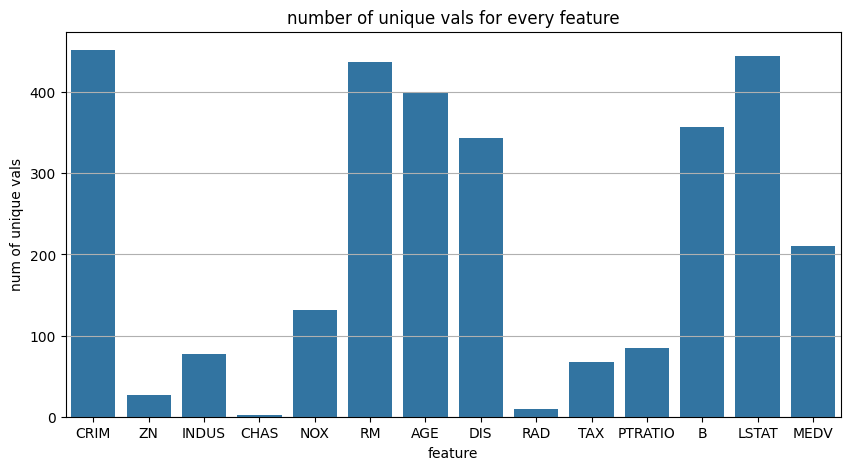

In [11]:
nu = df.nunique().reset_index(name="Unique_Values")
print(nu)
plt.figure(figsize=(10,5))
plt.title("number of unique vals for every feature")
plt.grid(True)
nu.columns = ['feature','num of unique vals']
ax = sns.barplot(x=nu.columns[0], y=nu.columns[1], data=nu)

### 4. Digram of the dependence of the features on each other. Which features are more dependent on the target column?

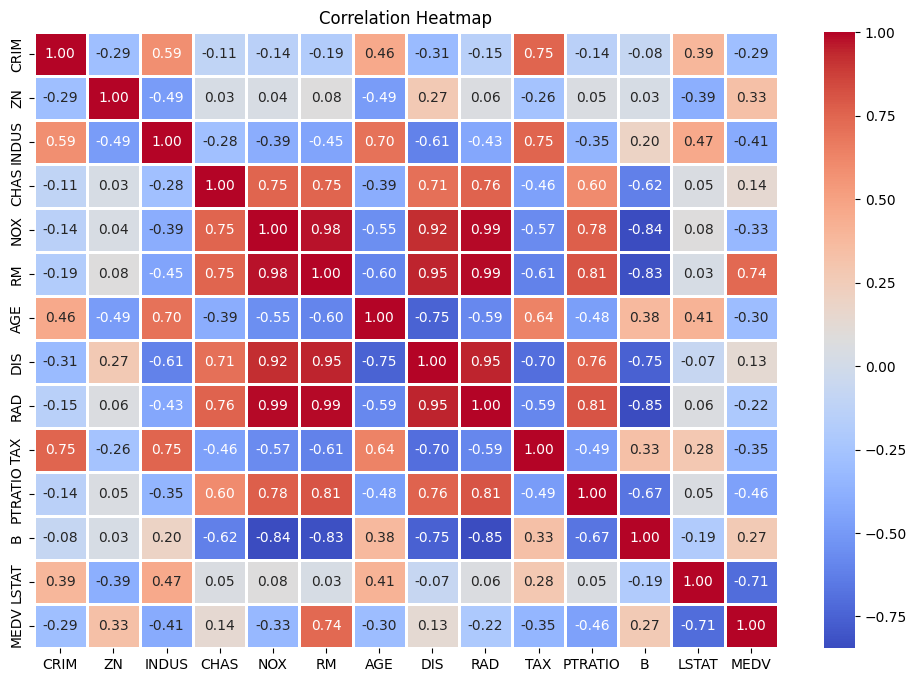

Correlation with target column (MEDV):
MEDV       1.000000
RM         0.740181
ZN         0.331570
B          0.269605
CHAS       0.136668
DIS        0.129355
RAD       -0.217902
CRIM      -0.286245
AGE       -0.299893
NOX       -0.332778
TAX       -0.345898
INDUS     -0.411915
PTRATIO   -0.461214
LSTAT     -0.706255
Name: MEDV, dtype: float64


In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.75)
plt.title('Correlation Heatmap')
plt.show()
print("Correlation with target column (MEDV):")
print(df.corr()['MEDV'].sort_values(ascending=False))

### 5. Scatter and hexbin charts are usually used to check the relationship of features. Use these charts to check dependencies with the target column. Briefly explain the use and meaning of each.

Hexbin plot is a type of 2-dimensional scatter plot that is used to visualize the distribution of data points. Unlike a traditional scatter plot, where each data point is represented as a single dot, a hexbin plot aggregates the data points into a set of hexagonal bins. Each hexagonal bin is color-coded to represent the density of data points within that bin. The color scale is usually represented by a color map that ranges from light to dark, where lighter colors indicate lower densities and darker colors indicate higher densities.

In addition to showing the relationship between two variables, hexbin plots can also be used to visualize the distribution of the data, identify outliers, and detect regions of high and low density. These plots are also useful for exploring the relationship between two variables in a non-parametric way, as they do not make assumptions about the underlying distribution of the data.

The resulting plot shows the distribution of sepal length and width, with each hexagonal bin representing a region in the plot where there is a higher density of data points. The color of each bin is represented by a color map that ranges from light to dark, where lighter colors indicate lower densities and darker colors indicate higher densities.

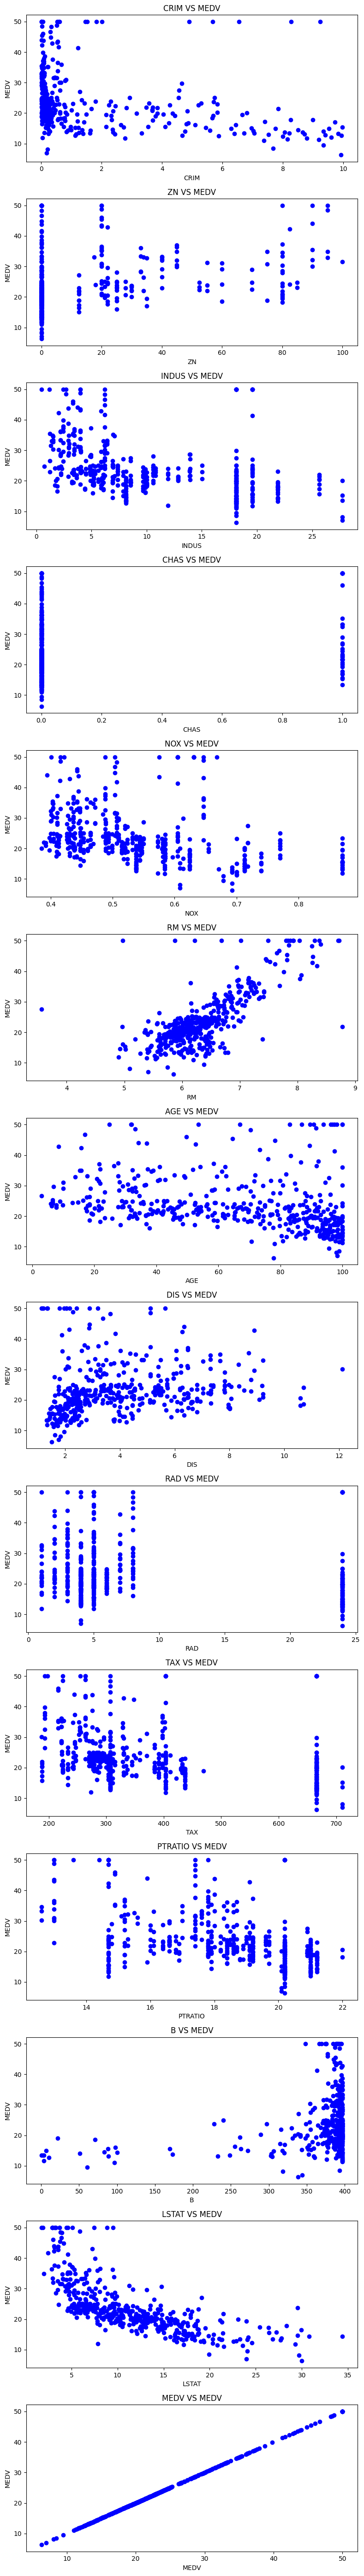

In [13]:
fig, axes = plt.subplots(nrows=len(col_names), ncols=1, figsize=(8, 4*len(col_names)))
for i, col in enumerate(col_names):
    axes[i].scatter(x=df[col] , y=df["MEDV"] , c="blue")
    axes[i].set_title(col + ' VS MEDV')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("MEDV")

plt.tight_layout()
plt.show()

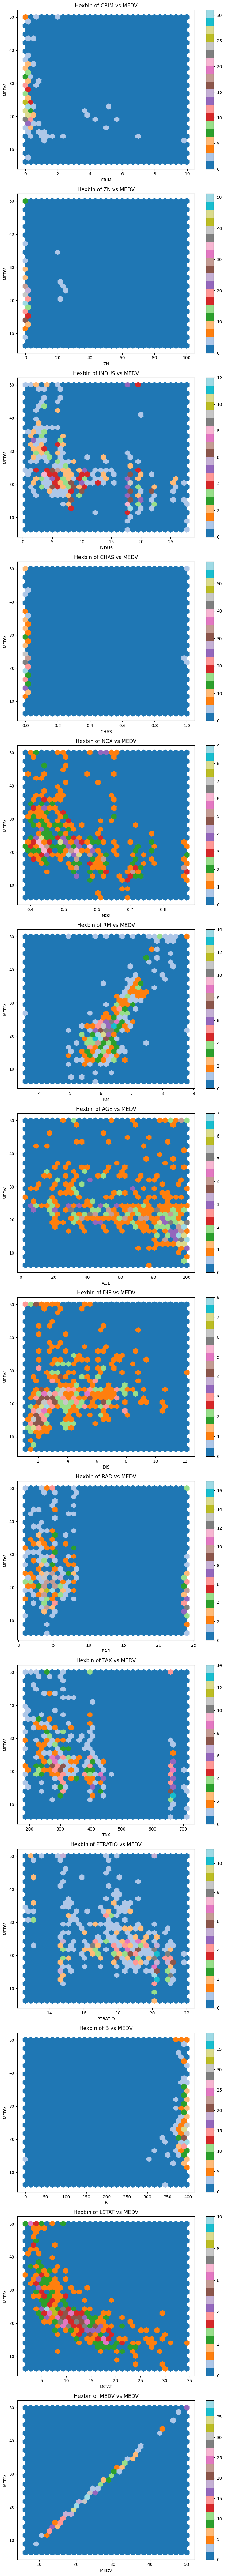

In [14]:
fig, axes = plt.subplots(nrows=len(col_names), ncols=1, figsize=(8, 6*len(col_names)))

for i, col in enumerate(col_names):
    hb = axes[i].hexbin(df[col], df["MEDV"], gridsize=30, cmap='tab20')
    axes[i].set_title(f"Hexbin of {col} vs MEDV")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("MEDV")
    fig.colorbar(hb, ax=axes[i])

plt.tight_layout()
plt.show()

### 6. Research other surveys you can use for the dataset and implement one.
In the below fig, a histogram and box plot is used to show the pattern of the variables (We see the distrinution of each column), as some variables have skewness and outliers. Univariate analysis demonstrated the data pattern as some variables to be transformed. Log transformation can help in normalization, so this variable can maintain standard scale with other variables. 
Also we can use pairplot. A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlations.

CRIM
Skew : 2.2


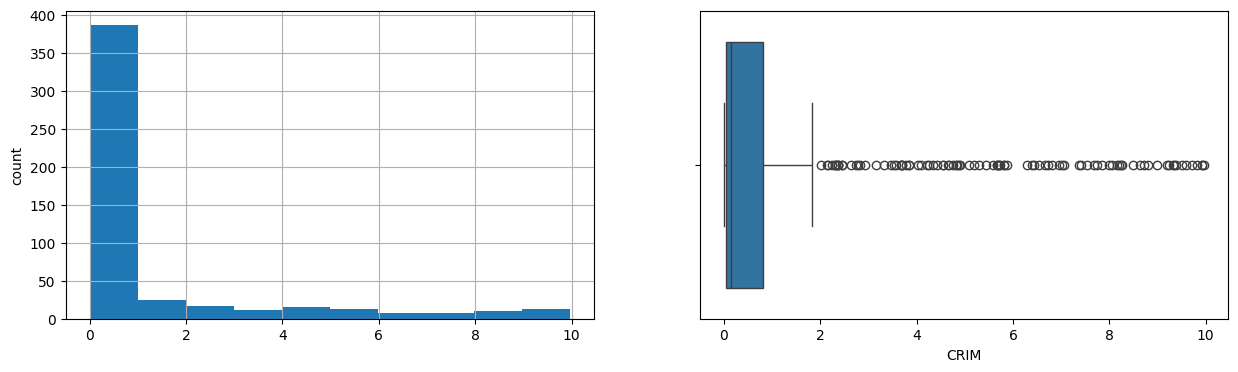

ZN
Skew : 2.07


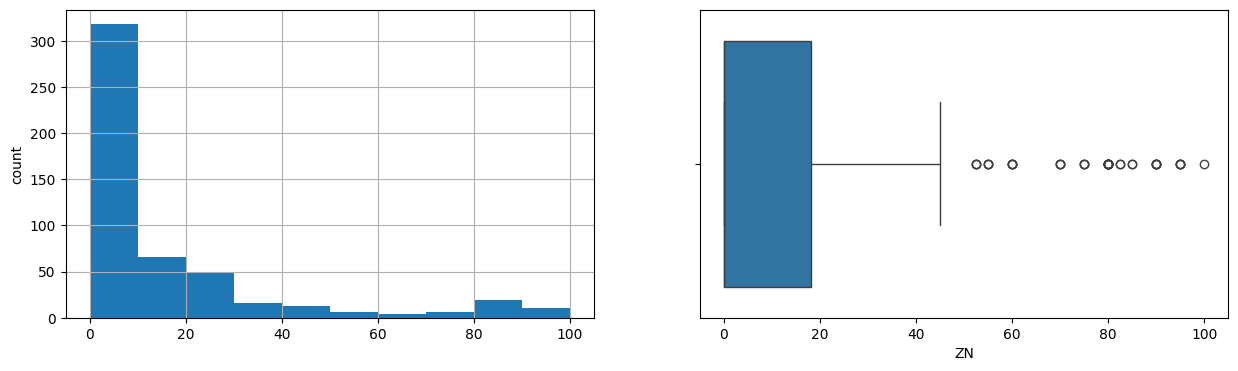

INDUS
Skew : 0.59


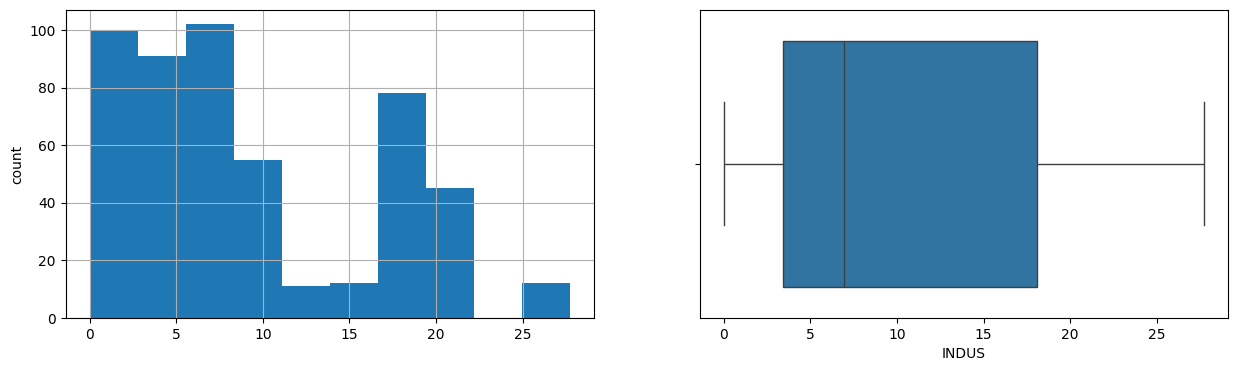

CHAS
Skew : 1.72


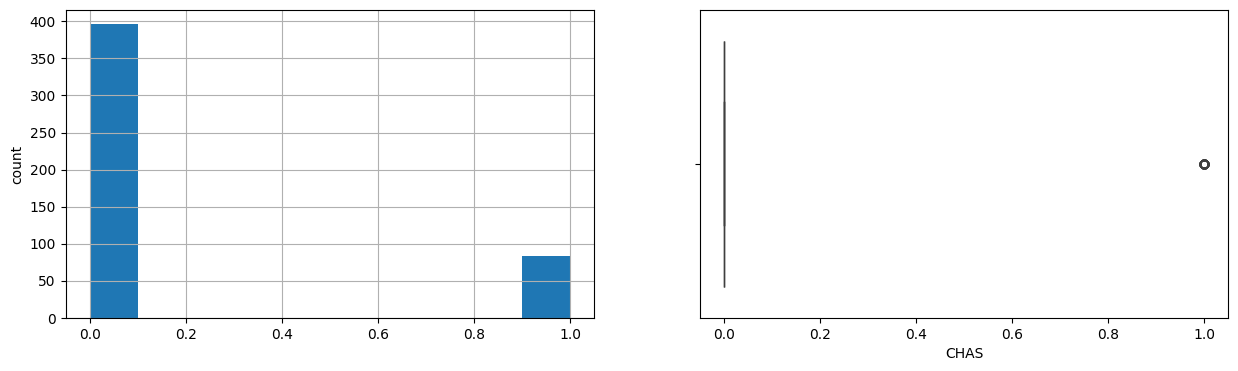

NOX
Skew : 2.65


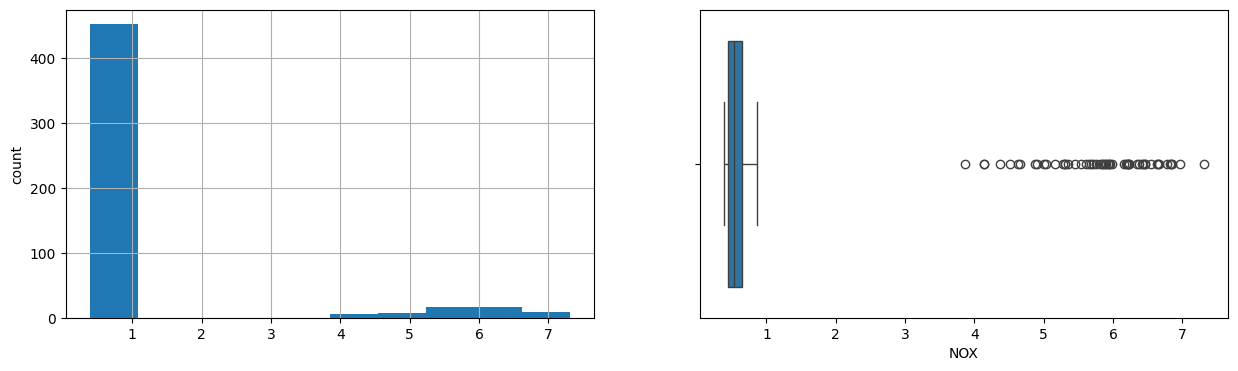

RM
Skew : 2.6


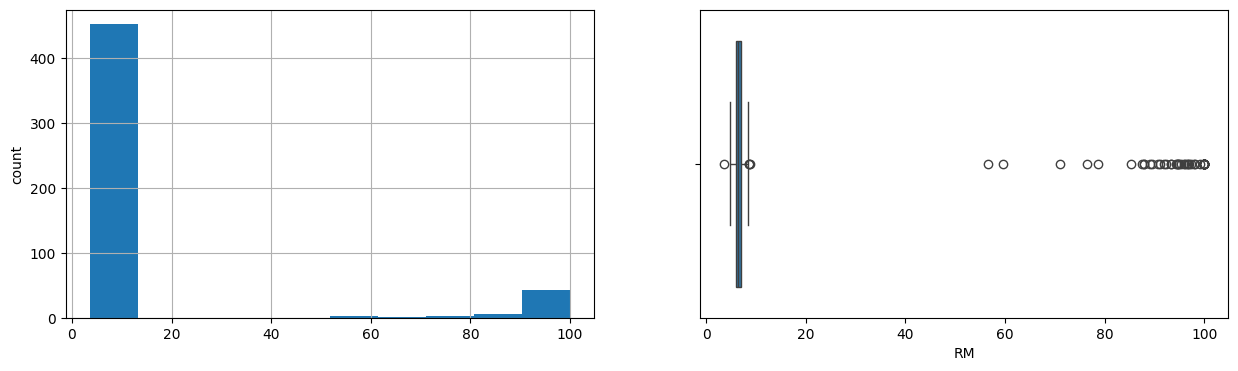

AGE
Skew : -0.39


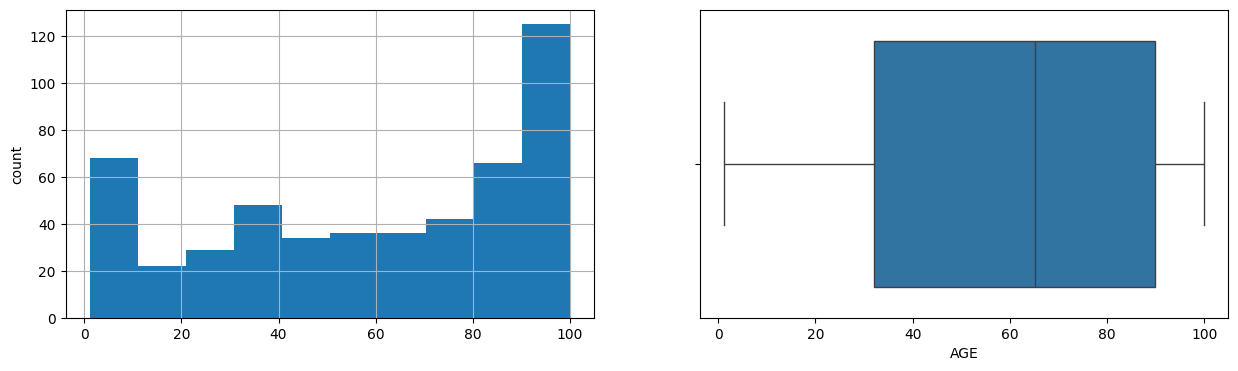

DIS
Skew : 2.11


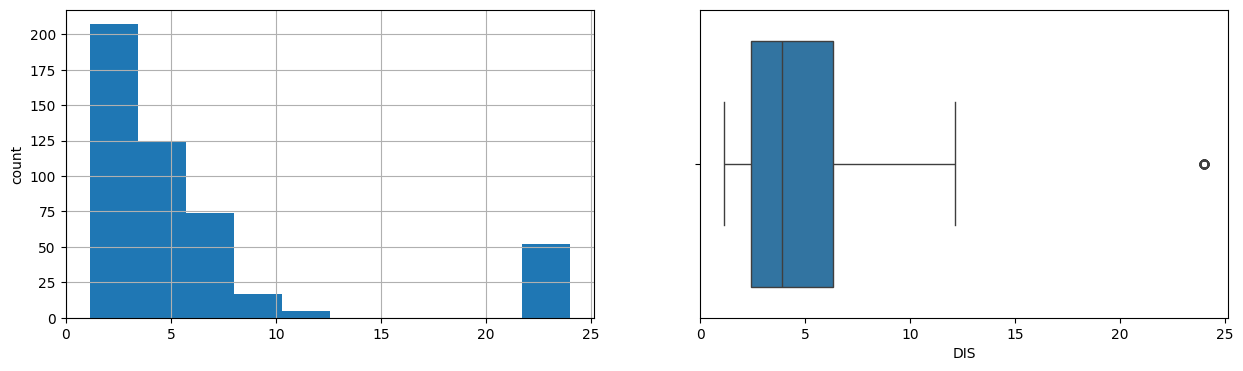

RAD
Skew : 2.55


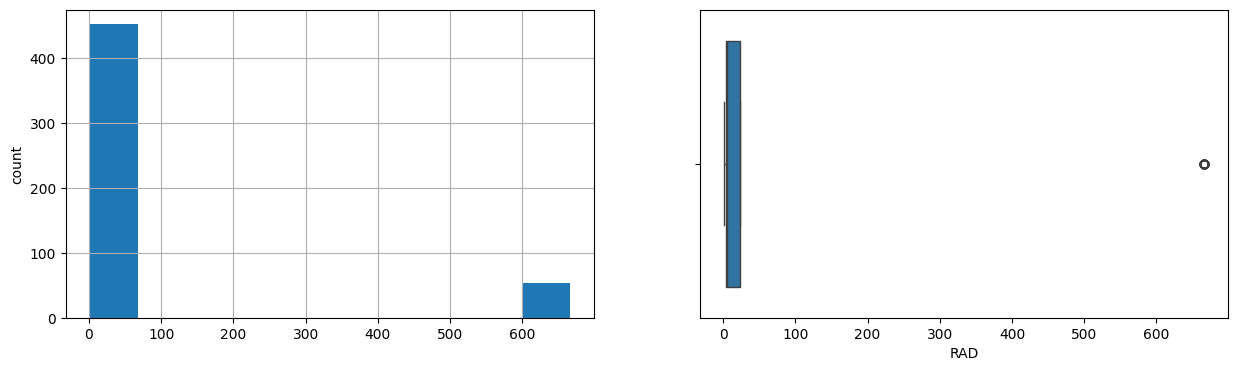

TAX
Skew : 0.37


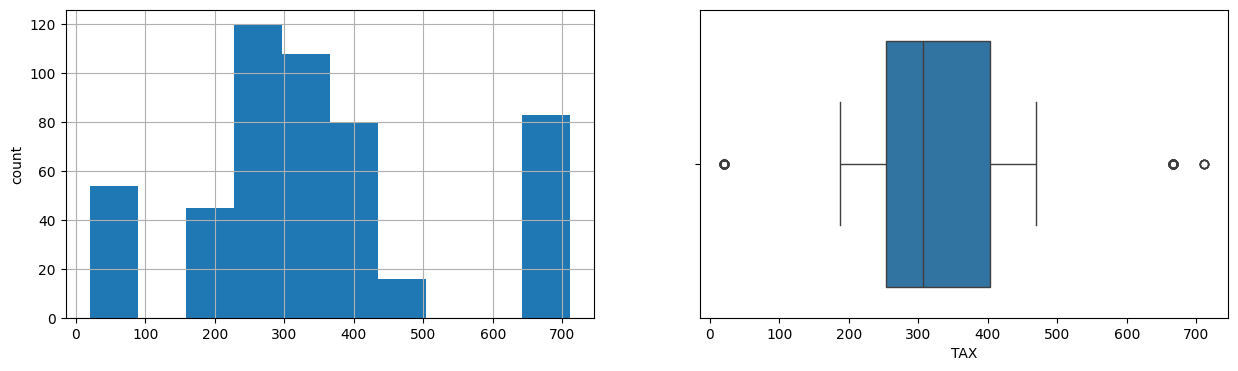

PTRATIO
Skew : 3.53


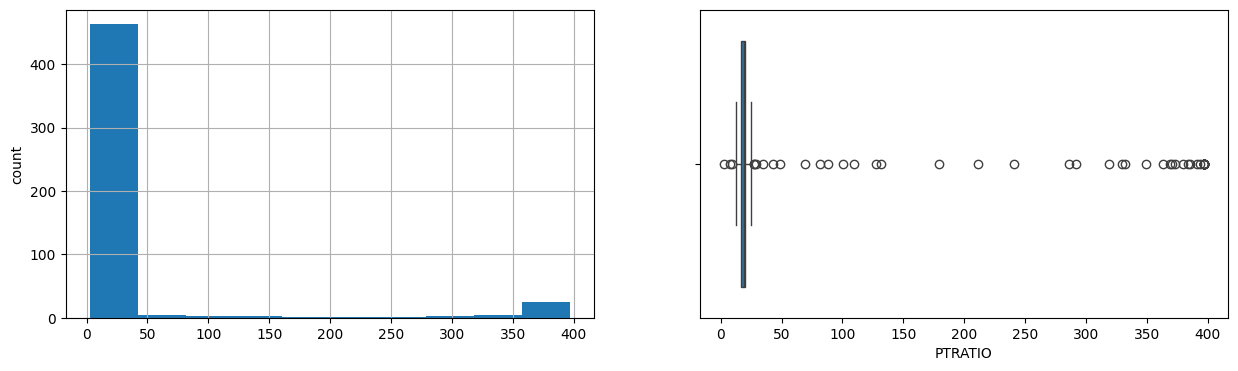

B
Skew : -2.07


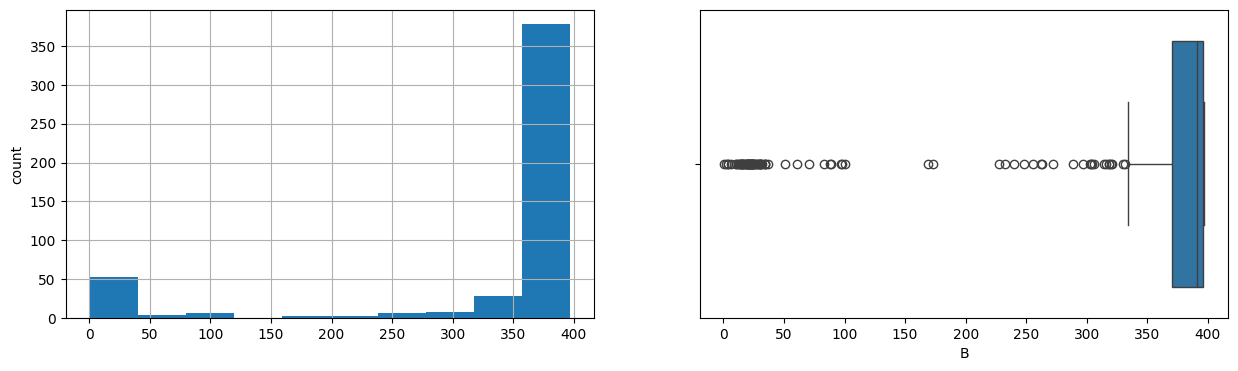

LSTAT
Skew : 0.9


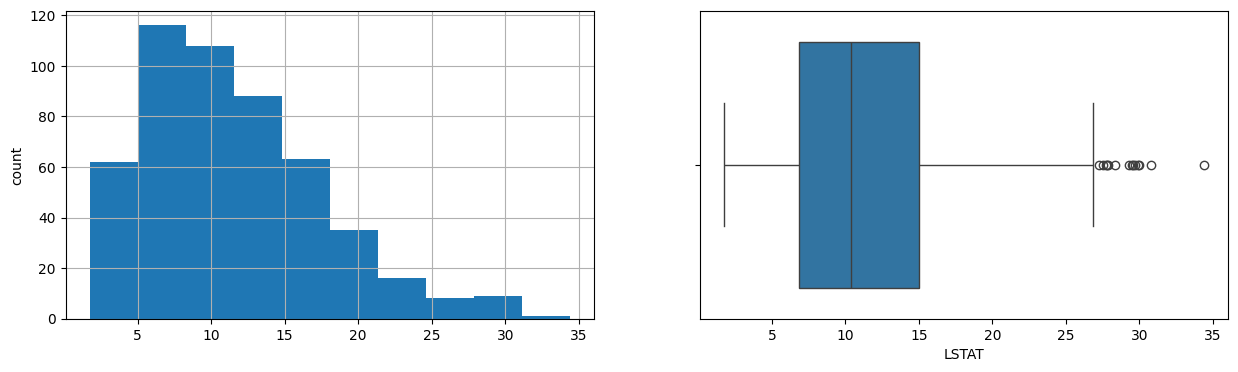

MEDV
Skew : 1.3


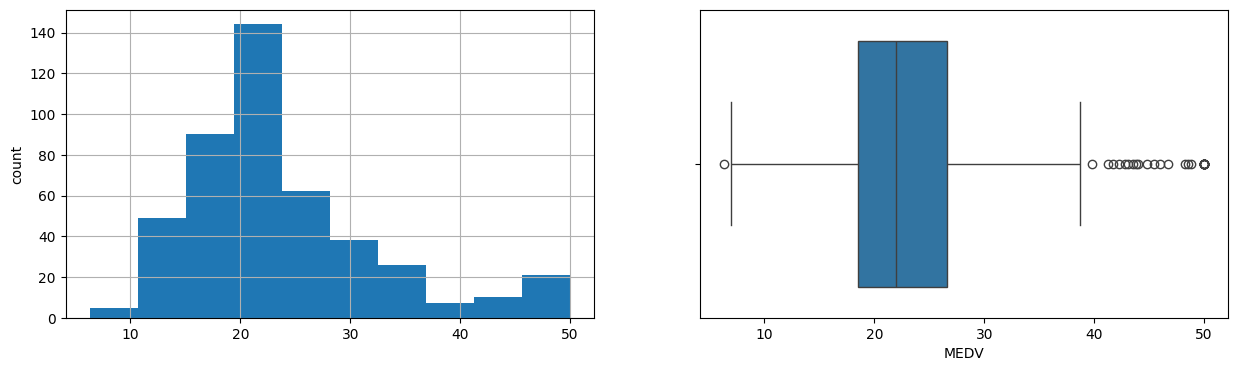

In [15]:
for col in col_names:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [16]:
# # Function for log transformation of the columns to remove skewness
# def log_transform(data,col):
#     for colname in col:
#         if (data[colname] == 1.0).all():
#             data[colname + '_log'] = np.log(data[colname]+1)
#         else:
#             data[colname + '_log'] = np.log(data[colname])
#     data.info()
    
# log_transform(df,['DIS', 'B'])
# sns.distplot(df["DIS_log"], axlabel="DIS_log")
# df

In [17]:
for feature in col_names:
    lower_limit = df[feature].mean() - 3 * df[feature].std()
    upper_limit = df[feature].mean() + 3 * df[feature].std()
    df.loc[df[feature] > upper_limit, feature] = upper_limit
    df.loc[df[feature] < lower_limit, feature] = lower_limit

/tmp/ipykernel_14029/228994629.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '688.6897134171326' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] > upper_limit, feature] = upper_limit


In [18]:
# after removing outliers
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 18.97%
Column ZN outliers = 8.89%
Column INDUS outliers = 0.00%
Column CHAS outliers = 94.86%
Column NOX outliers = 10.67%
Column RM outliers = 11.46%
Column AGE outliers = 0.00%
Column DIS outliers = 10.28%
Column RAD outliers = 10.67%
Column TAX outliers = 27.08%
Column PTRATIO outliers = 9.88%
Column B outliers = 17.00%
Column LSTAT outliers = 2.77%
Column MEDV outliers = 6.52%


/tmp/ipykernel_14029/4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/tmp/ipykernel_14029/4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/tmp/ipykernel_14029/4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and

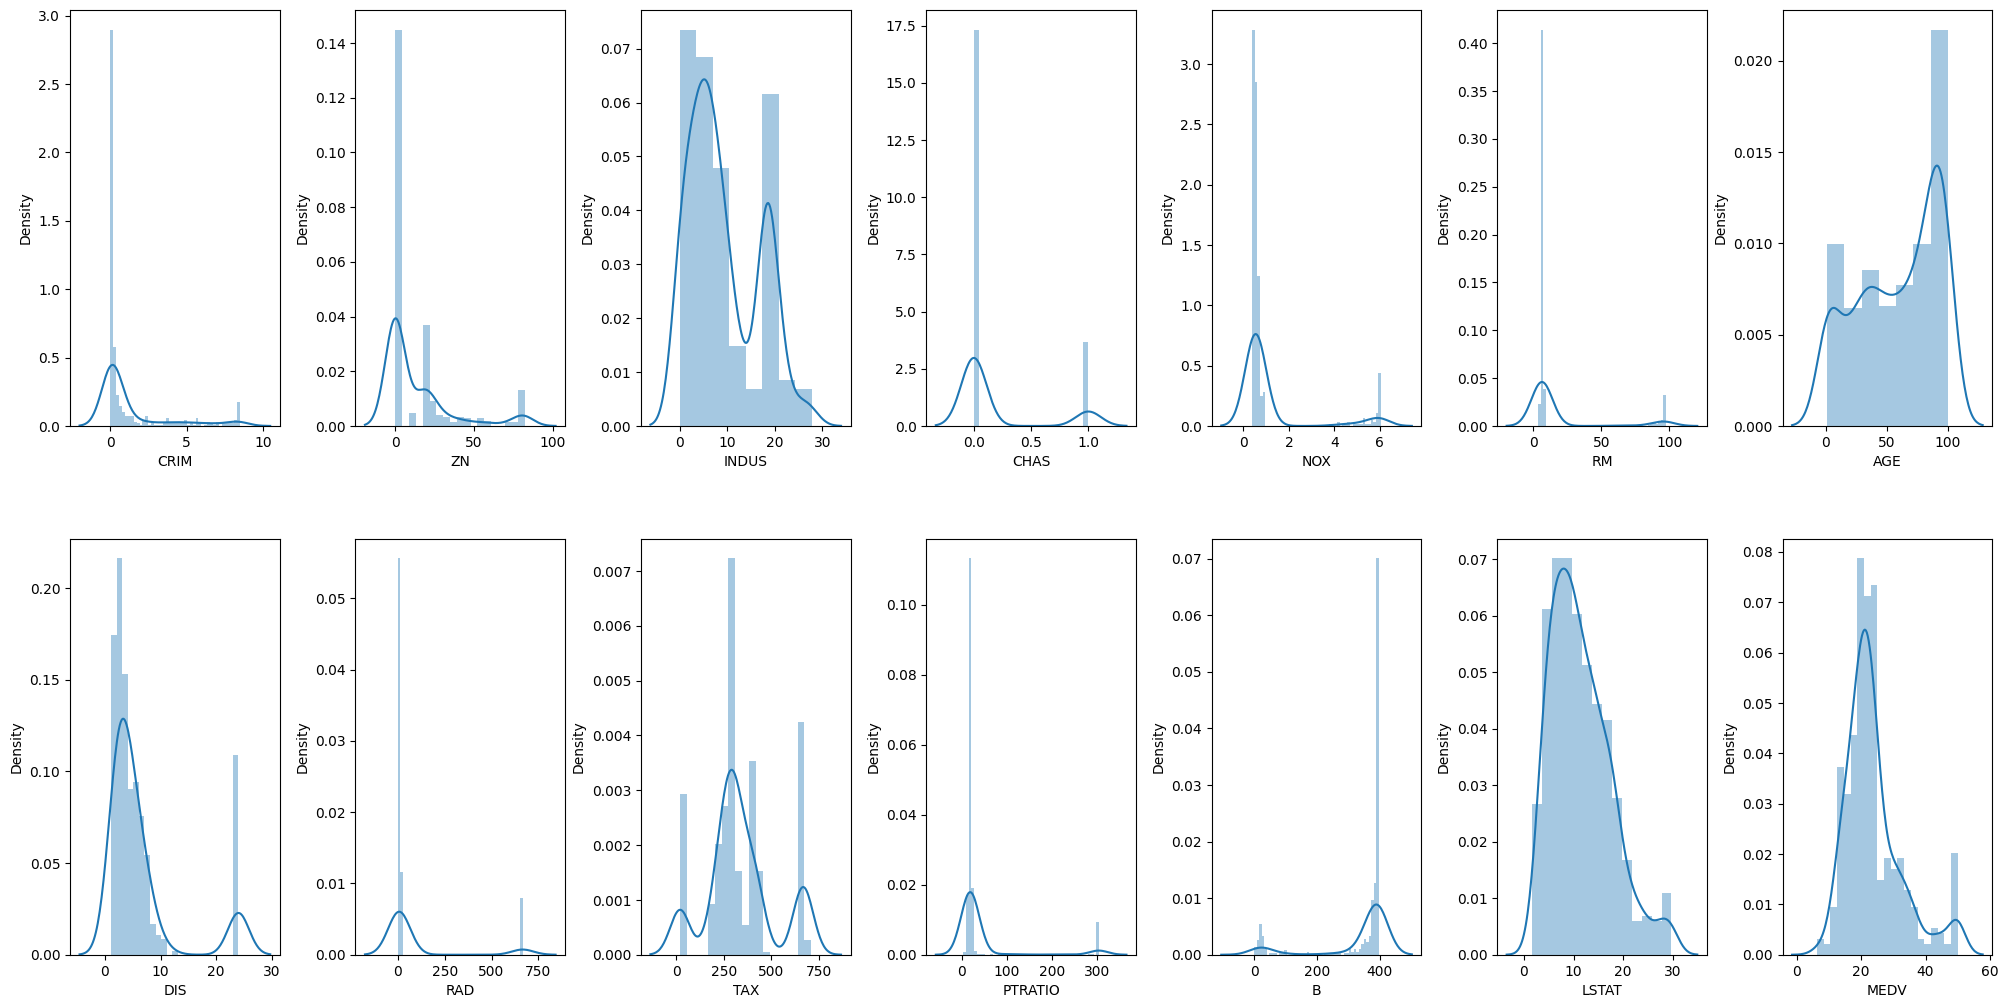

In [19]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Figure size 1300x1700 with 0 Axes>

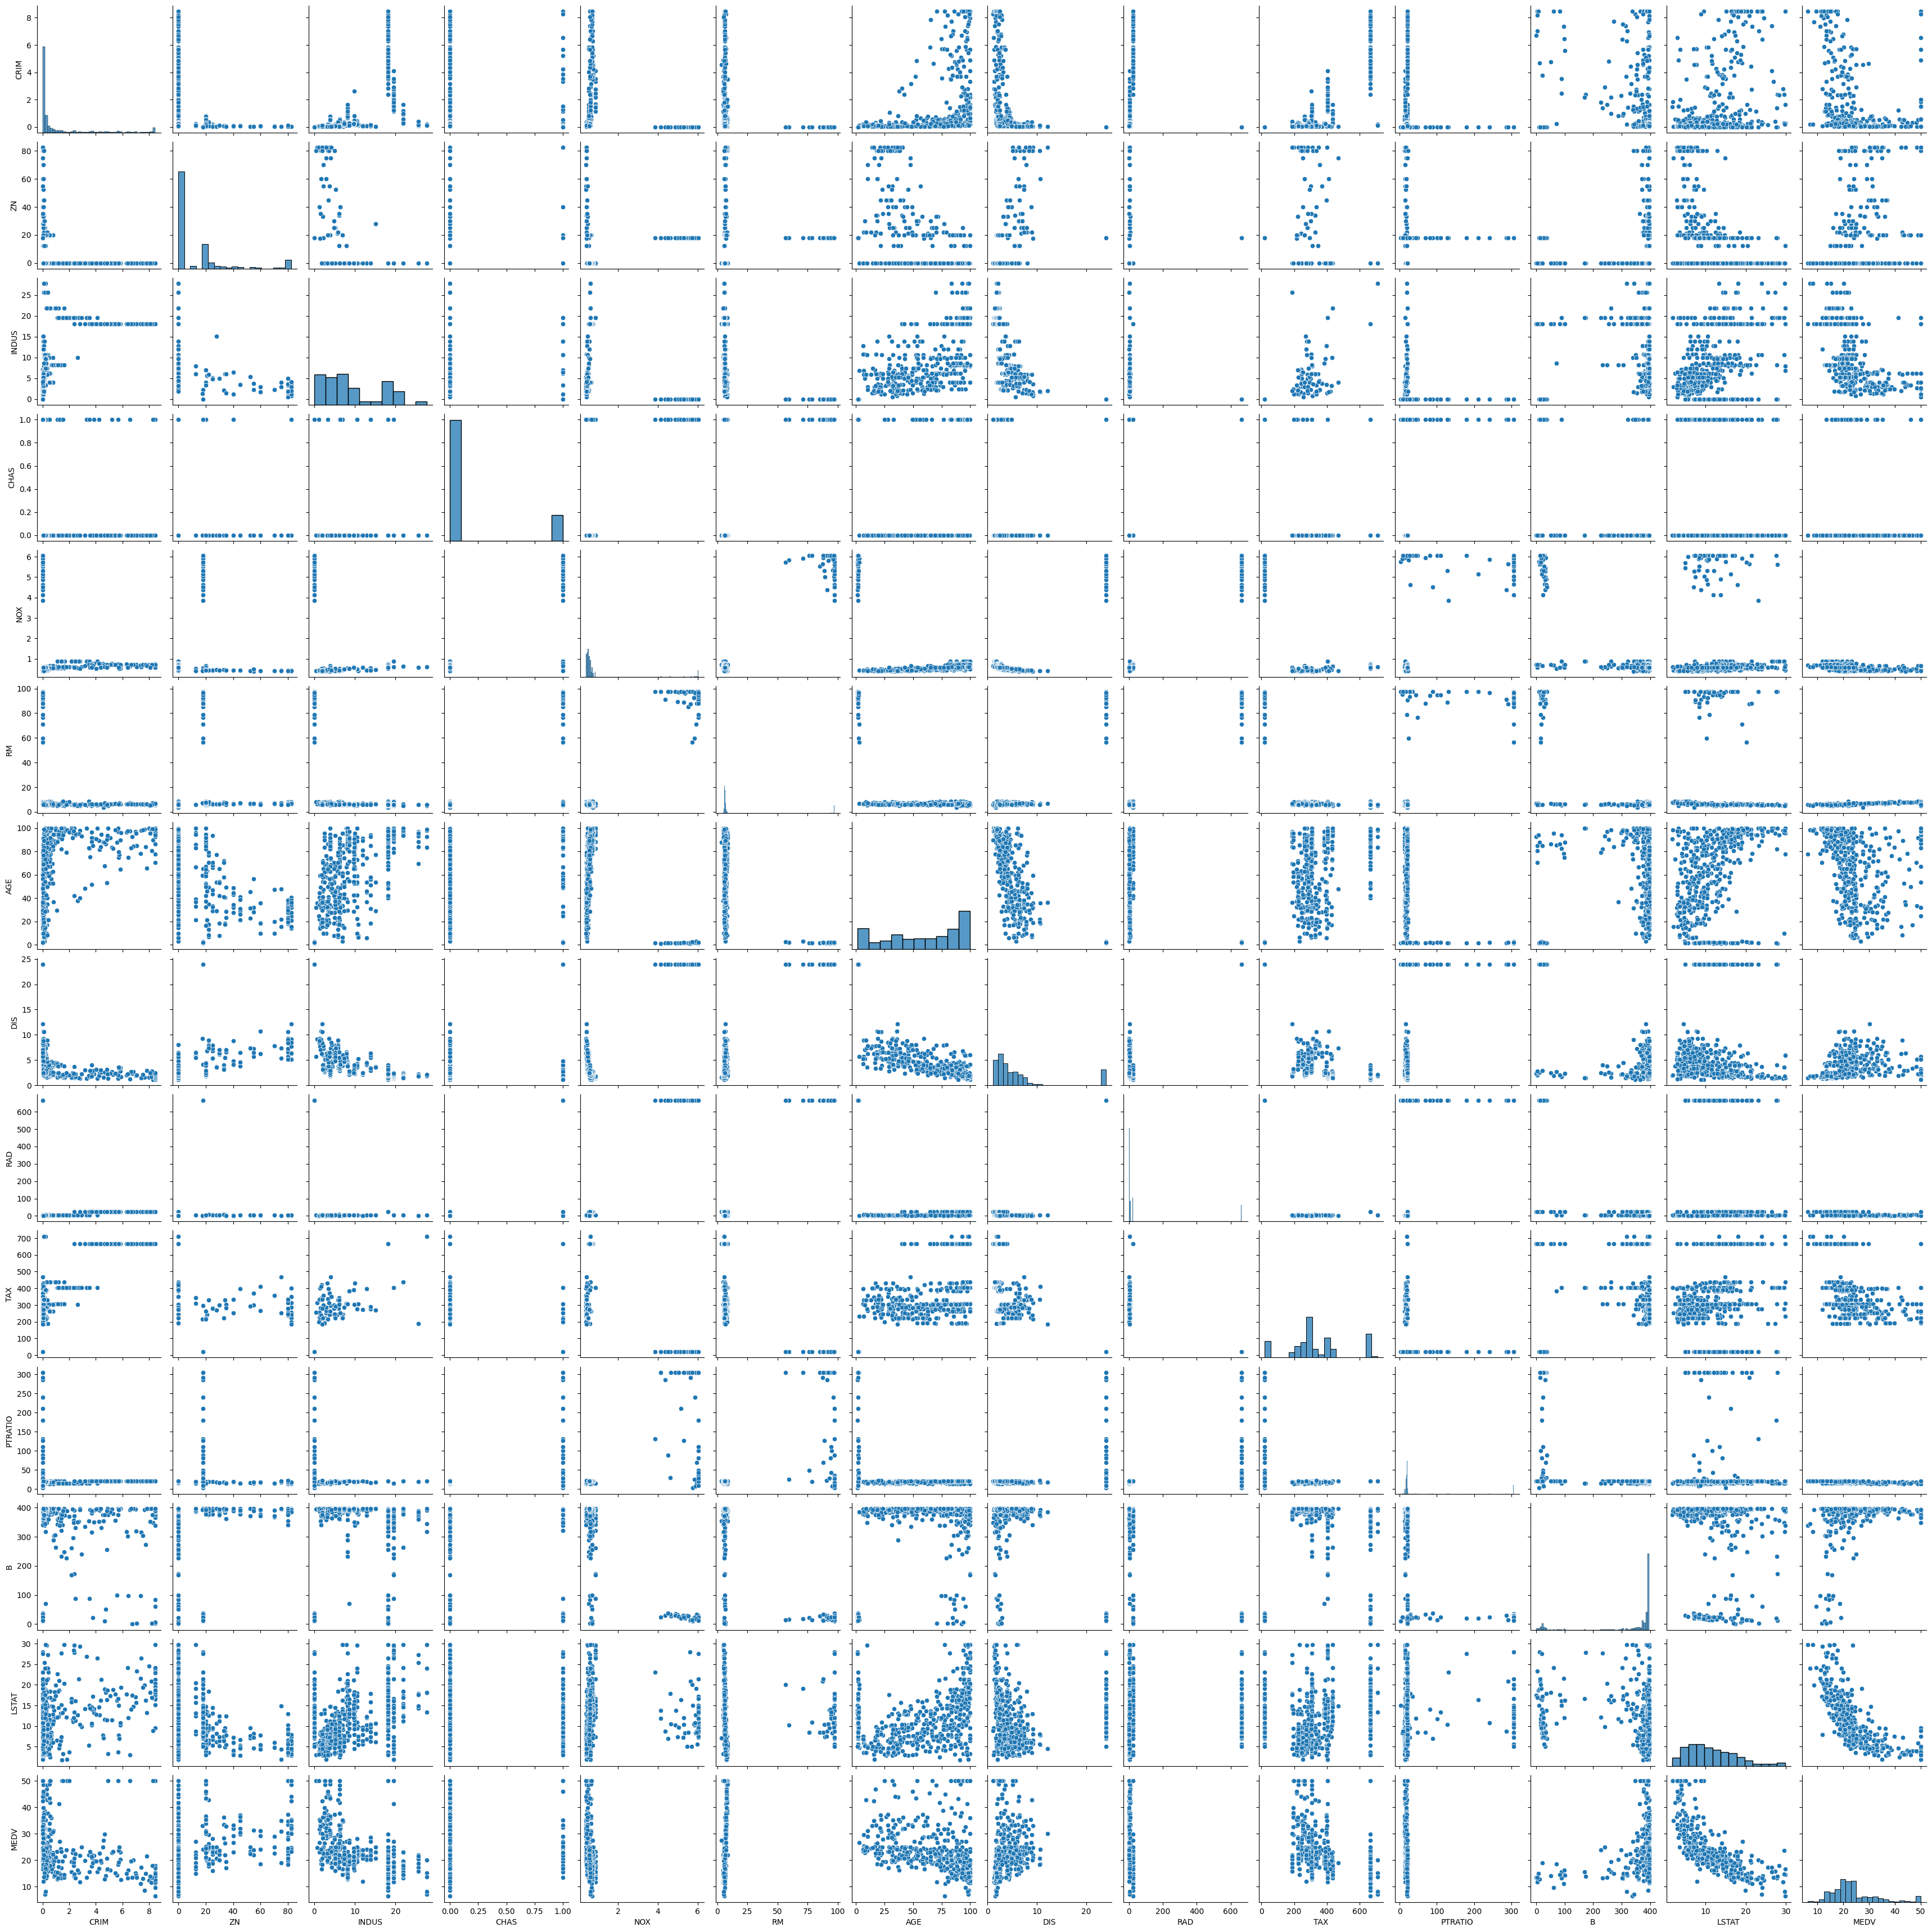

In [20]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df)
plt.show()

## ‍‍`Part 2`

## Data Set Preprocessing
**`Types of missing values`**: 

Missing values in a dataset can occur for various reasons, and understanding the types of missing values can help in choosing appropriate strategies for handling them.

1. **`Missing Completely at Random (MCAR)`**:
    In this scenario missing values completely occur at random and there is no relationship between the missing data and any other values in the dataset. That is there is no pattern. We can say that the probability of data being missing is the same for all observations.

2. **`Missing at Random (MAR)`**:
    In this scenario, missing values do not occur at random but the pattern of missingness could be explained by other observations. That is, the likelihood of a value missing in the dataset could possibly be due to some other variables in the dataset.

3. **`Missing Not at Random (MNAR)`**:
    In this case, the missing values are not random and cannot be explained by the observed data. This could be challenging case as possible reason for the missingness are related to the unobserved data.



### 7. Explain the methods of filling Value Missing and implement at least three methods. Briefly mention the reason for using each method.

1. **`Deleting the column with missing data`**: If a certain column has many missing values i.e., if majority of the datapoints has NULL value for a particular column then we can just simply drop the entire column. No doubt it is one of the quickest techniques one can use to deal with missing data but we also have to keep in mind that there is loss of information. This technique should only be used when majority of the values in a column has NULL values.

2. **`Deleting the row with missing data`**: In this method we are deleting rows which has at least one NULL value. This is not the best practice because of the fact that data is information. Even though other values are non null we delete the entire row if there is at least one NULL value. For instance, if every row has some (column) value missing, you might end up deleting the whole data.

3. **`Imputing missing values with mean/median/mode`**: Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values. \
This approach is popularly used when there are small number of missing values in the data. However, when there are many missing values, mean or median results can result in a loss of variation in the data. \
Mean and median imputation can provide a good estimate of the missing values, respectively for normally distributed data, and skewed data. \
The downside of this approach is that it cannot be applied for categorical columns. Also the mean imputation is sensitive to outliers and may not be a good representation of the central tendency of the data.

4. **`Imputation method for categorical columns`**: When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category.

5. **`Forward Fill and Backward Fill`**: Forward fill (ffill) and backward fill (bfill) are methods used to fill missing values by carrying forward the last observed non-missing value (for ffill) or by carrying backward the next observed non-missing value (for bfill). These methods are particularly useful for time-series data. If missing values should be filled with the most recent non-missing value, use ffill. If missing values should be filled with the next non-missing value, use bfill.

6. **`Interpolation`**: Interpolation is a technique used to fill missing values based on the values of adjacent datapoints. This technique is mainly used in case of time series data or in situation where the missing data points are expected to vary smoothly or follow a certain trend. It is also used in cases where it is regularly sampled data. \
Interpolation can be understood as a weighted average. The weights are inversely related to the distance to its neighboring points.

7. **`Model Based Imputation (Regression Model)`**: In the earlier methods to handle missing values, we do not use the correlation advantage of the variable containing the missing value and other variables. \
In this method we used predictive models to impute missing values based on other features in the dataset. \
The regression or classification model can be used for the prediction of missing values depending on the nature (categorical or continuous) of the feature having missing value.

8. **`Multiple Imputation`**: The Iterative Imputer is a method for imputing missing values in a dataset. It belongs to the scikit-learn library and implements the Multiple Imputation by Chained Equations (MICE) algorithm. MICE is an iterative imputation approach that imputes missing values one variable at a time, conditioned on the other variables.

9. **`K-Nearest Neighbors Imputations (KNNImputer)`**: Imputing missing values using k-Nearest Neighbors (KNN) is a technique where missing values are estimated based on the values of their nearest neighbors in the feature space. \
The idea is to find the k nearest data points and use their values to impute the missing values.

Four features with missing values in the Boston Housing dataset are CHAS, DIS, B, and MEDV. CHAS has two values, 1 and 0, with a skewness of 1.72. The skewness for DIS is 2.11, for B is -2.07, and for MEDV is 1.3, which is also the target variable. The percentage of outliers for each column is as follows: CHAS outliers = 94.86% (due to 1), DIS outliers = 10.28%, B outliers = 17.00%, and MEDV outliers = 6.92%.

For handling missing values, I plan to use KNN imputer or mode for CHAS, mean for DIS and B, and delete rows with missing MEDV values. (at the end, I will remove rows which MEDV is missing and use `Interpolate` to continue my project)

In [21]:
new_df = df.copy()
fea_transformer = KNNImputer(n_neighbors=5)
values = fea_transformer.fit_transform(new_df[["CHAS"]])
new_df["CHAS"] = pd.DataFrame(values)

mean_imputer = SimpleImputer(strategy='mean')
new_df[['DIS', 'B']] = mean_imputer.fit_transform(new_df[['DIS', 'B']])

new_df.dropna(subset=['MEDV'], inplace=True)

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    float64
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(14)
memory usage: 53.0 KB


In [23]:
new_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [24]:
df.dropna(subset=['MEDV'], inplace=True)
df = df.interpolate()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 8. Is it possible to delete some columns? Why? If it is possible, delete the necessary columns by mentioning the reason.
Yes, it's possible to delete columns from a dataset. We may want to delete columns for several reasons:

- Irrelevant to the Analysis: Some columns may not contribute meaningfully to the analysis or may not be relevant to the problem at hand.
- Highly Correlated with Other Columns: If two columns are highly correlated, keeping both may introduce multicollinearity issues in regression models.
- Contain a High Percentage of Missing Values: Columns with a large proportion of missing values may not provide useful information and can be removed.
- Redundant or Duplicated Information: Sometimes, columns may contain redundant or duplicated information, and removing one of them can simplify the dataset.
- Too Many Categories in Categorical Columns: For categorical columns with too many unique values, one-hot encoding can lead to a high number of features, which may not be desirable.

Since CHAS is a binary categorical variable and we're imputing missing values with the mode (which is essentially filling missing values), the column may not add much value to the analysis. However, I will keep it. 

There are strong strong correlations between RAD and RM, and also RAD and nox. It might be a good idea to remove for example RAD.

In [25]:
df = df.drop(["CHAS"], axis=1)
df.info() 
print(df.shape)
df

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   NOX      452 non-null    float64
 4   RM       452 non-null    float64
 5   AGE      452 non-null    float64
 6   DIS      452 non-null    float64
 7   RAD      452 non-null    float64
 8   TAX      452 non-null    float64
 9   PTRATIO  452 non-null    float64
 10  B        452 non-null    float64
 11  LSTAT    452 non-null    float64
 12  MEDV     452 non-null    float64
dtypes: float64(13)
memory usage: 49.4 KB
(452, 13)


CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  1.0  273.0     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  1.0  273.0     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  1.0  273.0     21.0   

           B  LSTAT  MEDV  
0    396.900   4.98  24.0  
1    396.900   9.14  21.6  
2    392.830   4.03  34.7  
3    394.865   2.94  33.4  
4    396.900   5.33  36.2  
..       ...    ...   ...  
501  391.990   9.67  22.4  
502  396.900   9.08  20.6  
503  396.900   5.64  23.9  
504  393.450   6.48  22.0  
505  396.900   7.88  11.9  

[452 rows x 13 columns]

### 9. Which features are called numerical and which ones are called categorical? What is the difference between these two types of features? Identify numerical and categorical characteristics in this data set.

In the context of machine learning, features can be categorized into two main types: numerical (or continuous) features and categorical (or discrete) features.

**`Numerical Features`**: Numerical features represent continuous quantities and can take on any real value within a certain range. These features can be further divided into interval or ratio variables.

**`Categorical Features`**: Categorical features represent discrete values that belong to a specific category or class. These features can be nominal (unordered) or ordinal (ordered).

**`Difference between Numerical and Categorical Features`**: Numerical features are represented by numbers and can be measured on a continuous scale. They often represent quantities such as measurements, counts, or proportions. Numerical features are used for calculations and can have a wide range of values. \
Categorical features, on the other hand, represent categories or groups. They can have a limited number of distinct values and are used to describe qualitative aspects of the data. Categorical features are typically not suitable for mathematical operations, but they play a crucial role in defining groups or classes.

In [26]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
[]
Numerical Variables:
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


### 10. What is the purpose of normalizing or standardizing in numerical features? What is the difference between these two methods? Is there a need to do this in this project?

The purpose of normalizing or standardizing numerical features is to scale the data so that all features have a similar scale. This is important because many machine learning algorithms perform better when the features are on a similar scale. Normalizing and standardizing are two common techniques used for this purpose.

**`Normalization`**: 
- `Purpose`: Normalization rescales the features to a range between 0 and 1.
- `Formula`: 
$$ X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$
 
- `Advantages`: Maintains the relative relationships between the values.
Useful when the features have a bounded range and you want to preserve zero values.
- `Disadvantages`: Sensitive to outliers.

**`Standardization`**:
- Purpose: Standardization rescales the features so that they have a mean of 0 and a standard deviation of 1.
- Formula: 
​$$ X_{\text{standardized}} = \frac{X - \mu}{\sigma}$$
 
- `Advantages`: Does not bound values to a specific range. Less sensitive to outliers compared to normalization.
- `Disadvantages`: Does not preserve the shape of the original distribution.

Particularly for those that are sensitive to the scale of the data like:

1. **Gradient Descent-Based Algorithms:** Models like Linear Regression, Logistic Regression, or Neural Networks that use gradient descent as an optimization technique perform better when the features are on the same scale, as it helps the algorithm converge faster.

2. **Distance-Based Algorithms:** Models that compute distances between data points like K-Nearest Neighbors (KNN), K-Means Clustering, or Support Vector Machines (SVM) can be biased towards features with broader ranges if the features are not standardized or normalized.

3. **Regularization:** Techniques such as Lasso or Ridge Regression that use regularization to prevent overfitting are also affected by the scale of the features. Regularization assumes that all features are centered around zero and have a variance in the same order. 

To decide whether to normalize or standardize, consider the following:

- If your data does not follow a Gaussian distribution or you need bounded values, normalization might be the preferred approach.
- If your data follows a Gaussian distribution, standardization may be more appropriate, especially for algorithms that assume the data is Gaussian.

In this project because of using Gradient Descent, and as we saw above our data does not follow a Gaussian distribution, so we need to use Normalization

### 11. For categorical features, which are usually stored as a string or object in the dataset, what pre-processing is useful in model training?

- **`Label Encoding`**:
    - Assigns a unique integer to each category.
    - Useful for ordinal categorical variables where the categories have an inherent order.
    - Example: Convert 'low', 'medium', 'high' to 0, 1, 2.
- **`One-Hot Encoding`**:
    - Creates binary dummy variables for each category.
    - Each category is represented by a column where 1 indicates the presence of that category and 0 indicates absence.
    - Useful for nominal categorical variables where there is no intrinsic order.
    - Example: Convert 'red', 'blue', 'green' to three binary columns.
- **`Dummy Encoding`**:
    - Similar to one-hot encoding but drops one category to avoid multicollinearity.
     Each category is represented by a binary column, except for one reference category.
    - Useful for nominal categorical variables.
    - Example: Convert 'red', 'blue', 'green' to two binary columns (dropping 'red' as the reference category).
- **`Frequency Encoding`**:
    - Replaces each category with the frequency of that category in the dataset.
    - Useful when the frequency of occurrence of each category is important.
    - Example: Convert 'red', 'blue', 'green' based on their frequency counts.
- **`Target Encoding (Mean Encoding)`**:
    - Replaces each category with the mean of the target variable for that category.
    - Useful when the target variable is categorical (classification problems).
    - Helps capture the relationship between the categorical feature and the target variable.
    - Example: Convert 'red', 'blue', 'green' based on the average target value for each category.
- **`Hashing Encoding`**:
    - Hashes the categorical values into a fixed number of bins.
    - Reduces dimensionality and memory usage.
    - Useful when the number of unique categories is very large.
    - Example: Convert categories into a fixed number of hash bins.

Not all methods are suitable for every algorithm. Linear models benefit from one-hot encoding, while algorithms such as tree-based models can handle label encoding well because they are not influenced by the ordinal nature implied by integers.

The choice of which encoding method to use depends on:
- The model being used.
- The nature of the categorical features (ordinal or nominal).
- The number of categories (high cardinality categories might require more sophisticated encoding methods).
- The size of the dataset (one-hot encoding can significantly increase the dimensionality of your dataset).

Before applying these methods, you should analyze your data closely and understand the nature of your categorical variables, along with the requirements of the models you plan to use.

### 12. Research about validation, train, test data and explain common segmentation methods. Then divide your data into these categories.
The train-test-validation split is fundamental in machine learning and data analysis, particularly during model development. It involves dividing a dataset into three subsets: training, testing, and validation. Train test split is a model validation process that allows you to check how your model would perform with a new data set.

The train-test-validation split helps assess how well a machine learning model will generalize to new, unseen data. It also prevents overfitting, where a model performs well on the training data but fails to generalize to new instances. By using a validation set, practitioners can iteratively adjust the model’s parameters to achieve better performance on unseen data.

**`Importance of Data Splitting in Machine Learning`**:
Data splitting involves dividing a dataset into training, validation, and testing subsets. The importance of Data Splitting in Machine Learning covers the following aspects:

`Training, Validation, and Testing`:
Data splitting divides a dataset into three main subsets: the training set, used to train the model; the validation set, used to track model parameters and avoid overfitting; and the testing set, used for checking the model’s performance on new data. Each subset serves a unique purpose in the iterative process of developing a machine-learning model.

`Model Development and Tuning`:
During the model development phase, the training set is necessary for exposing the algorithm to various patterns within the data. The model learns from this subset, adjusting its parameters to minimize errors. The validation set is important during hyperparameter tracking, helping to optimize the model’s configuration.

`Overfitting Prevention`:
Overfitting occurs when a model learns the training data well, capturing noise and irrelevant patterns. The validation set acts as a checkpoint, allowing for the detection of overfitting. By evaluating the model’s performance on a different dataset, you can adjust model complexity, techniques, or other hyperparameters to prevent overfitting and enhance generalization.

`Performance Evaluation`: 
The testing set is essential to a machine learning model’s performance. After training and validation, the model faces the testing set, which checks real-world scenarios. A well-performing model on the testing set indicates that it has successfully adapted to new, unseen data. This step is important for gaining confidence in deploying the model for real-world applications.

`Bias and Variance Assessment`: 
Train Test Validation Split helps in understanding the bias trade-off. The training set provides information about the model’s bias, capturing inherent patterns, while the validation and testing sets help assess variance, indicating the model’s sensitivity to fluctuations in the dataset. Striking the right balance between bias and variance is vital for achieving a model that generalizes well across different datasets.

`Cross-Validation for Robustness`: 
Beyond a simple train-validation-test split, techniques like k-fold cross-validation further enhance the robustness of models. Cross-validation involves dividing the dataset into k subsets, training the model on k-1 subsets, and validating the remaining one. This process is repeated k times, and the results are averaged. Cross-validation provides a more comprehensive understanding of a model’s performance across different subsets of the data.


For training and testing purposes of a  model, the  data should be  broken down into three different datasets :

- `The Training Set`: It is the data set used to train and make the model learn the hidden features in the data. The training set should have different inputs so that the model is trained in all conditions and can predict any data sample that may appear in the future.

- `The Validation Set`: The validation set is a set of data that is used to validate model performance during training. This validation process gives information that helps in tuning the model’s configurations. After every epoch, the model is trained on the training set, and the model evaluation is performed on the validation set. The main idea of splitting the dataset into a validation set is to prevent the model from becoming good at classifying the samples in the training set but not being able to generalize and make accurate classifications on the data it has not seen before.

- `The Test Set`: The test set is a set of data used to test the model after completing the training. It provides a final model performance in terms of accuracy and precision.



In [27]:
df_for_knn = df.copy()
df_for_dtree = df.copy()

In [28]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
temp = df[~mask]

mask = np.random.rand(len(temp)) < 0.5
validation_set = temp[mask]
test = temp[~mask]

In [29]:
print(len(train))
print(len(test))
print(len(validation_set))
print(len(validation_set) + len(test) + len(train) == len(df))

359
38
55
True


### 13. Research other preprocessing methods. Mention some of these methods and use them if needed.

## Part 3: Training, Evaluation and Adjustment

### Phase1: Linear Regression

### 14. In this project we are implementing supervised machine learning models. What is the difference between these models and unsupervised, semi-supervised and reinforcement learning models? Give an example for each.


1. **`Supervised Learning`**:
    - `Definition`: In supervised learning, the model learns from labeled data, where each example is paired with a target variable or outcome.
    - `Examples`: 
        - *`Linear Regression`*: Predicts a continuous value based on input features. For example, predicting house prices based on features like area, number of rooms, etc.
        - *`Classification`*: Predicts the class label or category of an input. For example, classifying emails as spam or not spam based on their content.

2. **` Unsupervised Learning`**:
    - `Definition`: In unsupervised learning, the model learns from unlabeled data, finding hidden patterns or structure within the data.
    - `Examples`:
        - *`Clustering`*: Groups similar data points into clusters. For example, segmenting customers into different groups based on their purchasing behavior.
        - *`Dimensionality Reduction`*: Reduces the number of features while preserving most of the information. For example, using Principal Component Analysis (PCA) to reduce the dimensionality of data.
3. **`Semi-Supervised Learning`**:
    - `Definition`: In semi-supervised learning, the model learns from a combination of labeled and unlabeled data.
    - `Examples`:
        - *`Self-training`*: Initially, the model is trained on a small labeled dataset. Then, it makes predictions on the unlabeled data, and the most confident predictions are added to the training set.
        - *`Co-training`*: The model is trained on different views of the data, each representing a different aspect. For example, in text classification, using two different feature sets (e.g., bag-of-words and TF-IDF) to train the model.
4. **`Reinforcement Learning`**:
    - `Definition`: In reinforcement learning, the model learns to make decisions by interacting with an environment to maximize cumulative rewards.
    - `Examples`:
        - *`Q-Learning`*: Learning optimal policies in a Markov Decision Process (MDP). For example, training an agent to play a game like Tic-Tac-Toe or Chess.
        - *`Deep Q-Networks (DQN)`*: Using deep neural networks to approximate the Q-function in reinforcement learning. For example, training an agent to play Atari games.


**`Differences`**:

- *`Supervised vs. Unsupervised Learning`*: Supervised learning requires labeled data, while unsupervised learning works with unlabeled data.
- *`Supervised vs. Semi-Supervised Learning`*: In supervised learning, all data points have labels, while in semi-supervised learning, only some data points have labels.
- *`Supervised vs. Reinforcement Learning`*: Supervised learning learns from a dataset, while reinforcement learning learns from interactions with an environment.
- *`Unsupervised vs. Reinforcement Learning`*: Unsupervised learning discovers patterns in data, while reinforcement learning learns to make decisions through trial and error.


Each type of machine learning model has its own set of techniques and applications, and the choice depends on the nature of the problem and the availability of labeled data.

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [30]:
class Linear_Regression_Model:
    def __init__(self):
        self.intercept = float()
        self.slope = float()
    
    def linear_regression(self, inp, out):
        x_mean = np.mean(inp)
        y_mean = np.mean(out)
        self.slope = np.sum((inp - x_mean) * (out - y_mean)) / np.sum((inp - x_mean) ** 2)
        self.intercept = y_mean - self.slope * x_mean
        print ("intercept: " , self.intercept)
        print ("slope: " , self.slope)
        return (self.intercept, self.slope)
    
    def get_regression_predictions(self, inp, intercept, slope):
        return slope * inp + intercept
    
    def get_root_mean_square_error(self, predicted_values, actual_values):
        residuals = np.subtract(predicted_values, actual_values)
        mean_squared_error = np.mean(np.square(residuals))
        root_mean_square_error = np.sqrt(mean_squared_error)
        return root_mean_square_error
    
    def get_r2_score(self, predicted_values, actual_values):
        mean_actual_values = sum(actual_values) / len(actual_values)
        total_sum_squares = sum((y - mean_actual_values) ** 2 for y in actual_values)
        residual_sum_squares = sum((yt - yp) ** 2 for yt, yp in zip(actual_values, predicted_values))
    
        r2 = 1 - (residual_sum_squares / total_sum_squares)
    
        return r2

``` python
    def linear_regression(self, inp, out):
        x_mean = np.mean(inp)
        y_mean = np.mean(out)
        self.slope = np.sum((inp - x_mean) * (out - y_mean)) / np.sum((inp - x_mean) ** 2)
        self.intercept = y_mean - self.slope * x_mean
        print ("intercept: " , self.intercept)
        print ("slope: " , self.slope)
        return (self.intercept, self.slope)
```

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

``` python
    def get_regression_predictions(self, inp, intercept, slope):
        return slope * inp + intercept
```

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

``` python
    def get_root_mean_square_error(self, predicted_values, actual_values):
        residuals = np.subtract(predicted_values, actual_values)
        mean_squared_error = np.mean(np.square(residuals))
        root_mean_square_error = np.sqrt(mean_squared_error)
        return root_mean_square_error
```

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

``` python
    def get_r2_score(self, predicted_values, actual_values):
        mean_actual_values = sum(actual_values) / len(actual_values)
        total_sum_squares = sum((y - mean_actual_values) ** 2 for y in actual_values)
        residual_sum_squares = sum((yt - yp) ** 2 for yt, yp in zip(actual_values, predicted_values))
    
        r2 = 1 - (residual_sum_squares / total_sum_squares)
    
        return r2
```

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

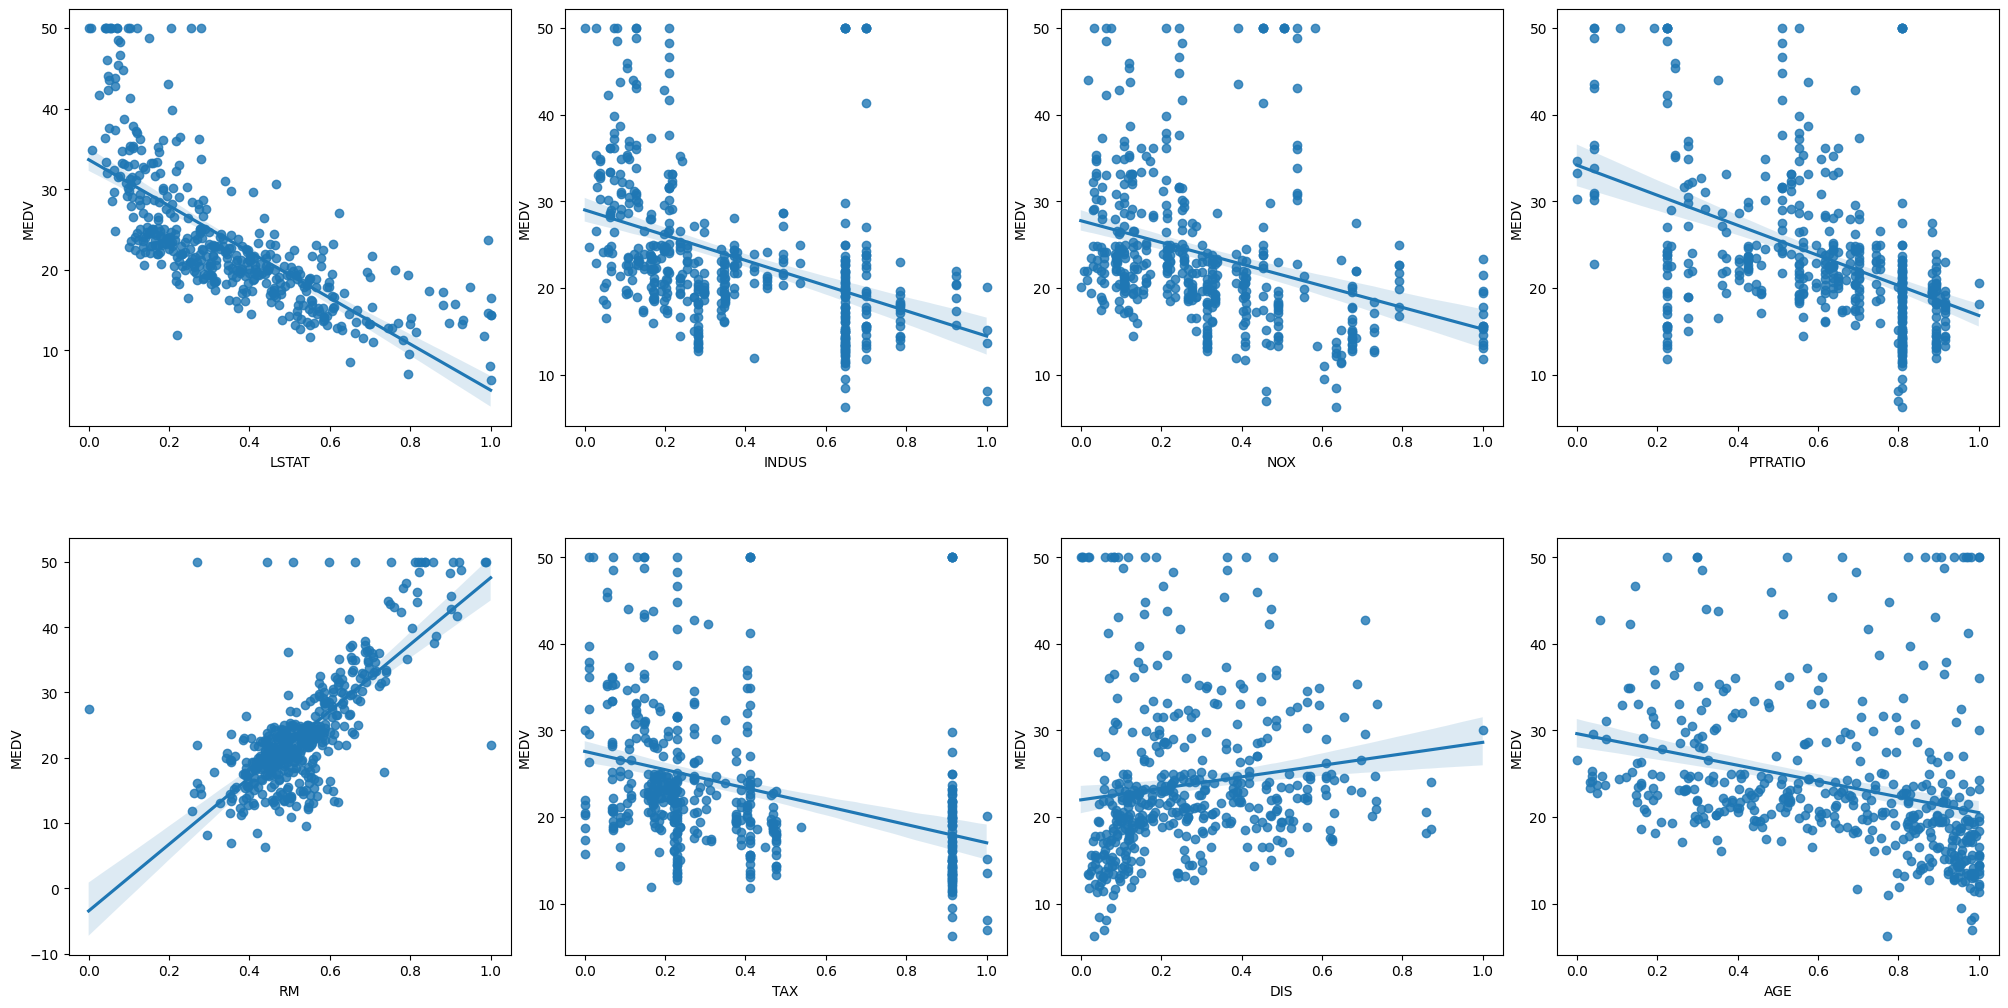

In [31]:
min_max_scaler = MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [32]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)
df

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0    0.000000  0.218337  0.067815  0.314815  0.577505  0.641607  0.269203   
1    0.002481  0.000000  0.242302  0.172840  0.547998  0.782698  0.348962   
2    0.002479  0.000000  0.242302  0.172840  0.694386  0.599382  0.348962   
3    0.003079  0.000000  0.063050  0.150206  0.658555  0.441813  0.448545   
4    0.007414  0.000000  0.063050  0.150206  0.687105  0.528321  0.448545   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.006656  0.000000  0.420455  0.386831  0.580954  0.681771  0.122671   
502  0.004604  0.000000  0.420455  0.386831  0.490324  0.760041  0.105293   
503  0.006435  0.000000  0.420455  0.386831  0.654340  0.907312  0.094381   
504  0.012206  0.000000  0.420455  0.386831  0.619467  0.889804  0.114514   
505  0.004857  0.000000  0.420455  0.386831  0.473079  0.802266  0.125072   

          RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0    0.000000  0.208015  0.287234  1.000000  0.116061  0.405034  
1    0.043478  0.104962  0.553191  1.000000  0.264618  0.350114  
2    0.043478  0.104962  0.553191  0.989737  0.082135  0.649886  
3    0.086957  0.066794  0.648936  0.994869  0.043210  0.620137  
4    0.086957  0.066794  0.648936  1.000000  0.128559  0.684211  
..        ...       ...       ...       ...       ...       ...  
501  0.000000  0.164122  0.893617  0.987619  0.283545  0.368421  
502  0.000000  0.164122  0.893617  1.000000  0.262476  0.327231  
503  0.000000  0.164122  0.893617  1.000000  0.139630  0.402746  
504  0.000000  0.164122  0.893617  0.991301  0.169627  0.359268  
505  0.000000  0.164122  0.893617  1.000000  0.219622  0.128146  

[452 rows x 13 columns]

In [43]:
cdf = df[["RM", "LSTAT", "MEDV"]]
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
temp = cdf[~msk]

msk = np.random.rand(len(temp)) < 0.5
validation_set = temp[msk]
test = temp[~msk]

print(len(train))
print(len(test))
print(len(validation_set))
print(len(validation_set) + len(test) + len(train) == len(df))

367
43
42
True


intercept:  -0.1948355455264883
slope:  1.1170511096279936
RM:


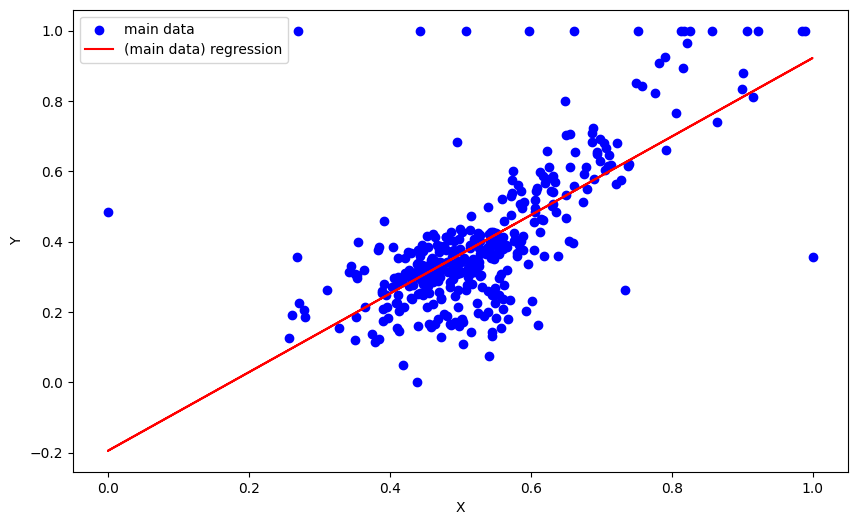

R2 score: 0.79
RMSE score: 0.10
-------------------------------------------------------------
intercept:  0.6268835941872881
slope:  -0.6579731950554052
LSTAT:


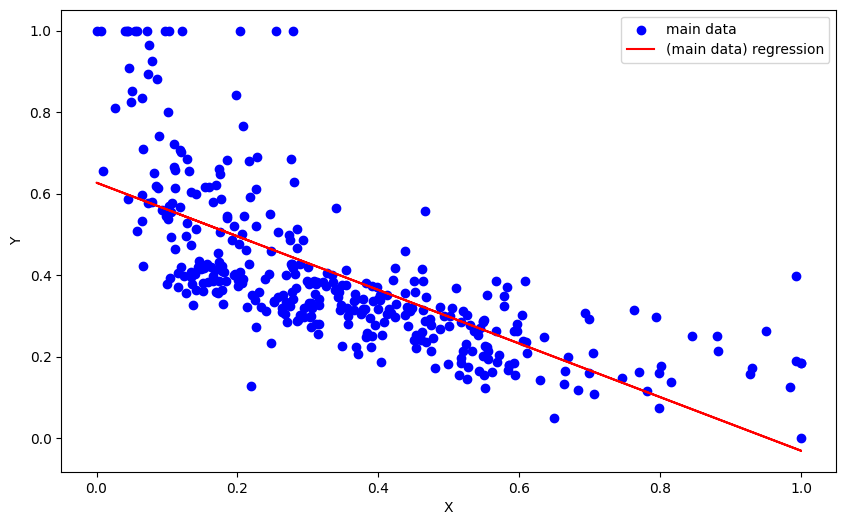

R2 score: 0.53
RMSE score: 0.16
-------------------------------------------------------------


In [44]:
My_Model = Linear_Regression_Model()
dict_for_yhat = {}
for feature in ["RM", "LSTAT"]:
    train_x = np.asanyarray(train[feature])
    train_y = np.asanyarray(train["MEDV"])
    test_x = np.asanyarray(test[feature])
    test_y = np.asanyarray(test["MEDV"])

    intercept, slope = My_Model.linear_regression(train_x, train_y)
    test_y_hat = My_Model.get_regression_predictions(test_x, intercept, slope)

    print(feature + ":")

    plt.figure(figsize=(10,6))
    plt.scatter(train[feature], train.MEDV, label='main data', color='blue')
    plt.plot(train_x, train_x*slope + intercept, label='(main data) regression', color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

    dict_for_yhat[feature] = test_y_hat
    
    print ("R2 score: %.2f" % My_Model.get_r2_score(test_y_hat, test_y))
    print ("RMSE score: %.2f" % My_Model.get_root_mean_square_error(test_y_hat, test_y))
    print ("-------------------------------------------------------------")

### 16. Briefly explain the formulas presented regarding the linear regression method.


1. **`Main Form of Simple Linear Regression Function`**:
    - $ f(x) = \alpha x + \beta $
    - Here, $ \alpha $ represents the slope (coefficient) and $ \beta $ represents the intercept (constant) in the linear regression model.
2. **`Residual Sum of Squares (RSS)`**:
    - The goal is to minimize the RSS to find the best-fit line.
    - $ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} x_i))^2 $
    - This is the sum of squared differences between actual values $( y_i )$ and predicted values $( \hat{y} )$. 
3. **`Derivatives of RSS`**:
    - Derivatives are taken with respect to $(\alpha)$ and $(\beta)$ and set to zero to find the optimal parameters.
    - $ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} x_i) = 0 $
    - $ \frac{\partial RSS}{\partial \alpha} = \sum (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i^2) = 0 $
4. **`Solving for Parameters`**:
    - From the derivative equations, we solve for $ \hat{\beta} $ and $ \hat{\alpha} $
    - From equation (1): $ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} $
    - From equation (2): $ \hat{\alpha} = \frac{\Sigma (x_i - \hat{x})(y_i - \hat{y})}{\Sigma (x_i - \hat{x})^2} $
5. **`Final Coefficient Estimates`**:
    - $ \hat{\beta} $ is calculated using the equation derived from (1).
    - $ \hat{\alpha} $ is calculated using the equation derived from (2).






### 17. Complete the specified sections in the notebook. Since the regression function is made of order 1, only one feature can be selected as the input of this function. In your opinion, which feature gives us a more accurate output than other features? Explain the reason for your choice.

To determine which feature gives a more accurate output for the regression function, we can calculate the correlation coefficient (Pearson correlation) between each feature and the target variable (MEDV). Features with higher absolute correlation coefficients are typically more predictive of the target variable. As I calculated before, "RM" and "LSTAT" have good correlation with target feature "MEDV". So we can use one of these 2 features to train our model.

### 18. After selecting the appropriate feature from the train data and predicting the test data, we must determine a criterion to evaluate the efficiency of the obtained output. Since our model is performing regression task and we have not done classification on it, it is not possible to use classification performance evaluation methods. Read about RSS, MSE, RMSE and R2 score methods and explain each one in your report.

1. Residual Sum of Squares (RSS):
    - Definition: RSS measures the total squared difference between the predicted values and the actual values.
    - Formula: $ \text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
    - Purpose: It quantifies the overall error of the model and represents the amount of unexplained variation in the data.
2. Mean Squared Error (MSE):
    - Definition: MSE calculates the average of the squared differences between predicted and actual values.
    - Formula: $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
    - Purpose: It provides a measure of the average squared deviation of predicted values from actual values.
3. Root Mean Squared Error (RMSE):
    - Definition: RMSE is the square root of the MSE and represents the average magnitude of the error in the same units as the target variable.
    - Formula: $ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $
    - Purpose: It gives a more interpretable measure of error compared to MSE as it's in the same units as the target variable.
4. Coefficient of Determination (R-squared, $ R^2 $ score)
    - Definition: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
    - Formula: $ R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} $ where TSS (Total Sum of Squares) is the total squared difference between the actual values and the mean of the actual values.
    - Purpose: It indicates the goodness of fit of the model, with a higher $ R^2 $ indicating a better fit.

Interpretation:
- RSS: Lower values are better. It is not normalized and its interpretation is dependent on the scale of the data.
- MSE and RMSE: Lower values are better. RMSE is more interpretable as it's in the same units as the target variable.
- $ R^2 $ Score: Higher values are better. It represents the proportion of variance explained by the model, with 1 being a perfect fit and 0 indicating that the model explains none of the variability of the response data around its mean.

Evaluation Criterion:
- For evaluating the efficiency of the regression model, we can use a combination of these metrics, such as MSE, RMSE, and $ R^2 $ score. Lower MSE and RMSE values and higher $ R^2 $ scores indicate better model performance.







### 19. Using the RMSE method and R2 score, evaluate the predicted values. Do the above operations on a few other features as well. What do you infer from the obtained values?

I have done this part before.

### 20. Compare the predicted values with the actual values using a scatter plot, where the x-axis shows the actual values and the y-axis shows the predicted values. Also draw the line y = x.

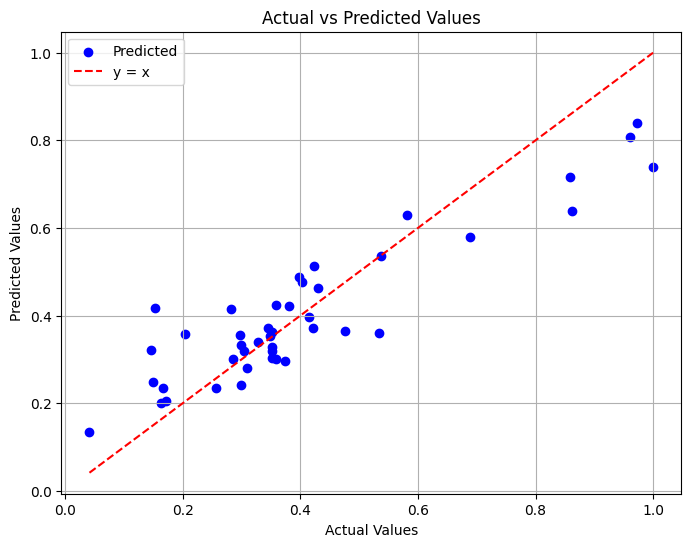

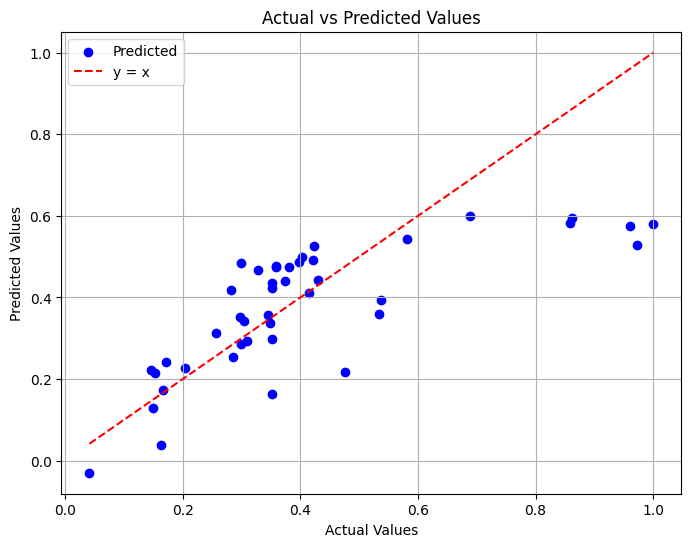

In [45]:
for i, j in dict_for_yhat.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(test_y, j, color='blue', label='Predicted')
    plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', label='y = x')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

## Phase 2: Polynomial Regression

## Phase 3: Classification

### 23. What is the concept of pruning in decision trees? Mention the advantages and disadvantages of using this method.
Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

One of the questions that arises in a decision tree algorithm is the optimal size of the final tree. A tree that is too large risks overfitting the training data and poorly generalizing to new samples. A small tree might not capture important structural information about the sample space. However, it is hard to tell when a tree algorithm should stop because it is impossible to tell if the addition of a single extra node will dramatically decrease error. This problem is known as the horizon effect. A common strategy is to grow the tree until each node contains a small number of instances then use pruning to remove nodes that do not provide additional information.

Pruning should reduce the size of a learning tree without reducing predictive accuracy as measured by a cross-validation set. There are many techniques for tree pruning that differ in the measurement that is used to optimize performance.

**`Advantages of Pruning`**:
1. Reduces Overfitting: Decision trees have a tendency to overfit the training data, meaning they capture noise or outliers in the data rather than the underlying patterns. Pruning helps to alleviate overfitting by simplifying the tree structure.
2. Improves Generalization: By reducing the complexity of the tree, pruning improves the model's ability to generalize well to unseen data, thus enhancing its predictive accuracy.
3. Reduces Model Complexity: Pruning leads to simpler decision trees, which are easier to interpret and understand, making them more suitable for deployment in real-world applications.
4. Computational Efficiency: Smaller trees resulting from pruning require less memory and are faster to evaluate, making them more efficient for both training and inference.

**`Disadvantages of Pruning`**:
1. Loss of Information: Pruning may remove potentially useful branches of the tree, leading to a loss of information and potentially reducing the model's predictive performance, especially if the pruning is too aggressive.
2. Selection Bias: The selection of which branches to prune may introduce bias, as some branches may appear less significant based on the training data but could be important for generalization on unseen data.
3. Difficulty in Tuning: Determining the optimal pruning strategy, such as when to stop pruning or how aggressively to prune, can be challenging and may require tuning hyperparameters based on cross-validation.
4. Risk of Underfitting: Over-pruning can lead to underfitting, where the model is too simplistic to capture the underlying patterns in the data, resulting in poor predictive performance on both the training and test datasets.

### 24. When can the use of decision trees have an advantage over other models?
Decision trees can have several advantages over other models in certain situations:

1. Interpretability: Decision trees are highly interpretable. The rules learned by a decision tree are easy to understand and visualize, making them suitable for scenarios where transparency and explainability are important.
2. No Assumptions about Data: Decision trees make no assumptions about the underlying distribution of the data or the relationships between variables. They can handle both numerical and categorical data without requiring preprocessing like normalization or encoding.
3. Non-linear Relationships: Decision trees are capable of capturing non-linear relationships between features and the target variable without explicitly modeling them. This makes them useful in situations where the relationships are complex or non-linear.
4. Handling Missing Values: Decision trees can handle missing values in the dataset without requiring imputation. They simply choose the best split based on the available data in each node.
5. Mixed Data Types: Decision trees can work with mixed data types (e.g., numerical and categorical) without the need for feature engineering. Other models like linear regression or neural networks typically require conversion of categorical variables into numerical representations.
6. Feature Importance: Decision trees provide a natural way to measure feature importance based on how frequently they are used for splitting, which can be useful for feature selection and understanding the data.
7. Scalability: Decision trees can be trained relatively quickly, especially when compared to more complex models like neural networks. They are suitable for large datasets with many features.
8. Ensemble Methods: Decision trees can serve as base learners for powerful ensemble methods like Random Forests and Gradient Boosting Machines, which often outperform other models on a wide range of tasks while maintaining interpretability to some extent.

However, decision trees also have limitations, such as tendency to overfit, instability with small variations in data, and sometimes lower predictive accuracy compared to more sophisticated models. Therefore, the advantage of decision trees over other models depends on the specific characteristics of the dataset and the requirements of the problem at hand.

### 25. What is the inherent difference of KNN classification with other classification methods such as neural networks or Logistic regression? (Pay attention to how each class is trained.)
The inherent difference between K-Nearest Neighbors (KNN) classification and other classification methods such as neural networks or logistic regression lies in their approach to training:

1. **`K-Nearest Neighbors (KNN) Classification`**:
    - Training: KNN does not involve explicit training of a model. Instead, it memorizes the entire training dataset.
    - Prediction: To classify a new data point, KNN finds the K nearest neighbors in the training data based on a distance metric (e.g., Euclidean distance) and assigns the majority class label among those neighbors to the new data point.
    - Pros: Simple and easy to understand. No assumptions about the underlying data distribution.
    - Cons: Computationally expensive during prediction for large datasets. Sensitivity to the choice of K and the distance metric.
2. **`Neural Networks`**:
    - Training: Neural networks consist of interconnected layers of neurons and are trained using algorithms like backpropagation. During training, the weights and biases of the network are adjusted to minimize the error between predicted and actual outputs.
    - Prediction: After training, neural networks use the learned weights to make predictions for new data by passing it through the network's layers.
    - Pros: Can capture complex relationships in data. Suitable for large datasets and high-dimensional feature spaces.
    - Cons: Requires a large amount of data for training. Complex architectures can be difficult to interpret.
3. **`Logistic Regression`**:
    - Training: Logistic regression models are trained by maximizing the likelihood function or minimizing the logistic loss function. This involves estimating the coefficients of the model using optimization algorithms like gradient descent.
    - Prediction: Once trained, logistic regression calculates the probability of each class for a new data point using the logistic function and assigns the class with the highest probability.
    - Pros: Simple and interpretable. Fast to train and make predictions.
    - Cons: Assumes a linear relationship between features and the log-odds of the outcome. Limited in handling complex non-linear patterns.

**`Difference in Training`**:
- KNN does not involve training a model; it simply stores the training data.
- Neural networks and logistic regression require training to learn the parameters of the model.

**`Inference`**:
The main difference lies in how the models are trained: KNN stores data, while neural networks and logistic regression learn from data to make predictions based on learned patterns.

### 26. Research the one nearest neighbor algorithm and mention its advantages and disadvantages.
The One Nearest Neighbor (1-NN) algorithm is a variant of the K-Nearest Neighbors (KNN) algorithm where K is set to 1. Instead of considering a fixed number of neighbors, 1-NN selects the single nearest neighbor to the query point and assigns the label of that neighbor to the query point.

**`Advantages of 1-NN`**:
1. Simplicity: 1-NN is straightforward to implement and understand. It doesn't require tuning a hyperparameter like K in KNN.
2. Non-parametric: Like KNN, 1-NN is non-parametric, meaning it makes no assumptions about the underlying distribution of the data. It can capture complex decision boundaries.
3. Flexibility: 1-NN can handle multi-class classification problems as well as binary classification.
4. Localized Decision Making: 1-NN makes decisions based on the closest single data point, which can be useful for tasks where local information is more important than global patterns.

**`Disadvantages of 1-NN`**:
1. Sensitivity to Noise: 1-NN is highly sensitive to noisy data and outliers. Since it relies on a single nearest neighbor, it can easily be misled by noisy data points.
2. Computational Complexity: While 1-NN is simple conceptually, it can be computationally expensive during inference, especially for large datasets. Computing the distance between the query point and all training points can be time-consuming.
3. Overfitting: 1-NN tends to overfit the training data, especially when the feature space is high-dimensional. It may capture noise in the training data instead of underlying patterns.
4. Imbalanced Data: 1-NN can perform poorly on imbalanced datasets because it may assign the majority class label to minority class instances if they happen to be the nearest neighbors.
5. Curse of Dimensionality: In high-dimensional feature spaces, the distance between data points may lose its meaning, which can degrade the performance of 1-NN.

**`Use Cases`**:
- 1-NN is suitable for tasks where interpretability and simplicity are prioritized over predictive accuracy, such as small or medium-sized datasets with clear local patterns.
- It can be useful in scenarios where the cost of misclassification is high, as it tends to make conservative decisions by relying on the nearest neighbor.

Overall, while 1-NN has its advantages in simplicity and flexibility, its sensitivity to noise and computational complexity make it less suitable for many real-world applications compared to more sophisticated algorithms like support vector machines or random forests.

### 27. Research about other distance measurement methods in KNN algorithm and state some of them.
1. **`Manhattan Distance (L1 norm)`**:
- Definition: Manhattan distance, also known as the L1 norm, calculates the sum of the absolute differences between corresponding coordinates of two points.
- Formula: $ d(x, y) = \sum_{i=1}^{n} |x_i - y_i| $
- Advantages: 
    - Suitable for high-dimensional data where features are less correlated.
    - Robust to outliers as it considers the absolute differences.
- Disadvantages:
    - Less effective when features have different scales.
    - May not capture the actual distance in spaces where diagonal movements are restricted.
1. **`Minkowski Distance (Generalization of Euclidean and Manhattan)`**:
- Definition: Minkowski distance is a generalization of both Euclidean and Manhattan distances, where the parameter p determines the type of distance metric.
- Formula: $ d(x, y) = (\sum_{i=1}^n |x_i - y_i|^p)^p $
    - when p=2, it is equivalent to Euclidean distance.
    - When p=1, it is equivalent to Manhattan distance.
- Advantages:
    - Provides flexibility to adjust the sensitivity to different dimensions.
- Disadvantages:
- Choosing the value of p can be subjective and may require tuning.
1. **`Chebyshev Distance (Maximum value of the absolute differences)`**:
- Definition: Chebyshev distance calculates the maximum absolute difference between corresponding coordinates of two points.
- Formula: $ d(x, y) = max_i |x_i - y_i| $
- Advantages:
    - Suitable for grid-based or chessboard-like structures.
    - Less sensitive to outliers.
- Disadvantages:
    - Less effective when data is not grid-like or when diagonal movements are allowed.

### 28. In this phase of the project, firstly, we divide the target column which contains the average price of occupied houses (MEDV) into 3 categories, the top two deciles of prices are luxury houses, the bottom two deciles are economic houses and the rest of the housesو We label them as normal houses and save them as a new column. Then you implement two models based on Decision Trees, Neighbors-Nearest-K using the scikit learn library. Then change the meta-parameters and optimize the model as much as possible. Optimizing the models aims to minimize the cost function but not overfitting. Show one of the optimized models that you have reached by trial and error in your report.

### 29. For both of these models, obtain the optimal values for the parameters with the help of the GridSearchCV function. Briefly explain how this function works. And compare the obtained results with the obtained results of the models whose parameters were obtained by trial and error.

GridSearchCV is a scikit-learn function that performs hyperparameter tuning by training and evaluating a machine learning model using different combinations of hyperparameters. The best set of hyperparameters is then selected based on a specified performance metric.

GridSearchCV works by defining a grid of hyperparameters and then systematically training and evaluating a machine learning model for each hyperparameter combination. The process of training and evaluating the model for each combination is called cross-validation. The best set of hyperparameters is then selected based on the performance metric.

To use GridSearchCV, you need to specify the following:
- The hyperparameters to be tuned: This includes specifying a range of values for each hyperparameter.
- The machine learning model: This includes the type of model you want to use and its parameters.
- The performance metric to be used: This is the metric that will be used to evaluate the performance of the different hyperparameter combinations.

In [46]:
df_sorted = df.sort_values(by='MEDV')
deciles = df_sorted['MEDV'].quantile([0.2, 0.8])
df['House_Category'] = pd.cut(df['MEDV'], bins=[float('-inf'), deciles.iloc[0], deciles.iloc[1], float('inf')], labels=['economic', 'standard', 'luxury'])
df

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0    0.000000  0.218337  0.067815  0.314815  0.577505  0.641607  0.269203   
1    0.002481  0.000000  0.242302  0.172840  0.547998  0.782698  0.348962   
2    0.002479  0.000000  0.242302  0.172840  0.694386  0.599382  0.348962   
3    0.003079  0.000000  0.063050  0.150206  0.658555  0.441813  0.448545   
4    0.007414  0.000000  0.063050  0.150206  0.687105  0.528321  0.448545   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.006656  0.000000  0.420455  0.386831  0.580954  0.681771  0.122671   
502  0.004604  0.000000  0.420455  0.386831  0.490324  0.760041  0.105293   
503  0.006435  0.000000  0.420455  0.386831  0.654340  0.907312  0.094381   
504  0.012206  0.000000  0.420455  0.386831  0.619467  0.889804  0.114514   
505  0.004857  0.000000  0.420455  0.386831  0.473079  0.802266  0.125072   

          RAD       TAX   PTRATIO         B     LSTAT      MEDV House_Category  
0    0.000000  0.208015  0.287234  1.000000  0.116061  0.405034       standard  
1    0.043478  0.104962  0.553191  1.000000  0.264618  0.350114       standard  
2    0.043478  0.104962  0.553191  0.989737  0.082135  0.649886         luxury  
3    0.086957  0.066794  0.648936  0.994869  0.043210  0.620137         luxury  
4    0.086957  0.066794  0.648936  1.000000  0.128559  0.684211         luxury  
..        ...       ...       ...       ...       ...       ...            ...  
501  0.000000  0.164122  0.893617  0.987619  0.283545  0.368421       standard  
502  0.000000  0.164122  0.893617  1.000000  0.262476  0.327231       standard  
503  0.000000  0.164122  0.893617  1.000000  0.139630  0.402746       standard  
504  0.000000  0.164122  0.893617  0.991301  0.169627  0.359268       standard  
505  0.000000  0.164122  0.893617  1.000000  0.219622  0.128146       economic  

[452 rows x 14 columns]

In [47]:
df.isnull().sum()

CRIM              0
ZN                0
INDUS             0
NOX               0
RM                0
AGE               0
DIS               0
RAD               0
TAX               0
PTRATIO           0
B                 0
LSTAT             0
MEDV              0
House_Category    0
dtype: int64

In [48]:
def make_confusion_matrix(real_labels , pred_labels):
    cm = confusion_matrix(real_labels, pred_labels)
    sns.set(font_scale=1.4) 
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap = "RdYlGn", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return cm

In [92]:
df_for_dtree = df.copy()
df_for_knn = df.copy()

### Decision Tree

In [57]:
class Decision_Tree_Model:
    def __init__(self, data_frame, criterion) -> None:
        self.df = data_frame
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
        self.y_test = None
        self.X_valid = None
        self.y_valid = None
        self.dt_classifier = DecisionTreeClassifier(criterion=criterion)

    def bring_dataframe(self, num_cols, main_df, random_state, column_sels):
        scaler = MinMaxScaler()
        self.df = pd.DataFrame(scaler.fit_transform(self.df[num_cols]), columns=num_cols, index=self.df.index)
        self.df["House_Category"] = main_df["House_Category"]

        X = self.df.loc[:,column_sels]
        Y = self.df["House_Category"]
        
        self.X_train, X_temp, self.y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=random_state)
        self.X_valid, self.X_test, self.y_valid, self.y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)
    
    def fit_predict(self):
        self.dt_classifier.fit(self.X_train, self.y_train)
        pred_tree = self.dt_classifier.predict(self.X_test)
        return pred_tree

    
    def make_confusion_matrix_and_classification_report(self, dt_pred):
        cm_DT = make_confusion_matrix(self.y_test, dt_pred)
        print(classification_report(self.y_test, dt_pred))
        print(f"Decision Tree Accuracy for train datas: {self.dt_classifier.score(self.X_train, self.y_train) * 100:5.2f}%")
        print(f"Decision Tree Accuracy for test datas: {self.dt_classifier.score(self.X_test, self.y_test) * 100:5.2f}%")


    def draw_decision_tree(self, column_sels, dt_classifier):
        dot_data = StringIO()
        filename = "tree.png"
        featureNames = column_sels
        out = export_graphviz(dt_classifier,feature_names=featureNames, out_file=dot_data, class_names= np.unique(self.y_train), filled=True,  special_characters=True,rotate=False)  
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        graph.write_png(filename)
        img = mpimg.imread(filename)
        plt.figure(figsize=(100, 200))
        plt.imshow(img,interpolation='nearest')

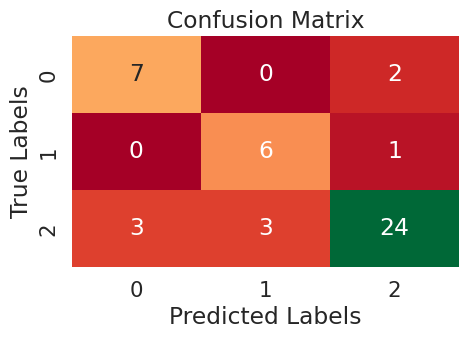

              precision    recall  f1-score   support

    economic       0.70      0.78      0.74         9
      luxury       0.67      0.86      0.75         7
    standard       0.89      0.80      0.84        30

    accuracy                           0.80        46
   macro avg       0.75      0.81      0.78        46
weighted avg       0.82      0.80      0.81        46

Decision Tree Accuracy for train datas: 100.00%
Decision Tree Accuracy for test datas: 80.43%


In [58]:
column_used = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
decisionTree_Model = Decision_Tree_Model(data_frame=df_for_dtree, criterion="entropy")

decisionTree_Model.bring_dataframe(num_cols=num_cols, main_df=df, random_state=42, column_sels=column_used)

pred_labels = decisionTree_Model.fit_predict()

decisionTree_Model.make_confusion_matrix_and_classification_report(pred_labels)

### 30. Draw your final decision tree. (You can use tree_plot for this.)

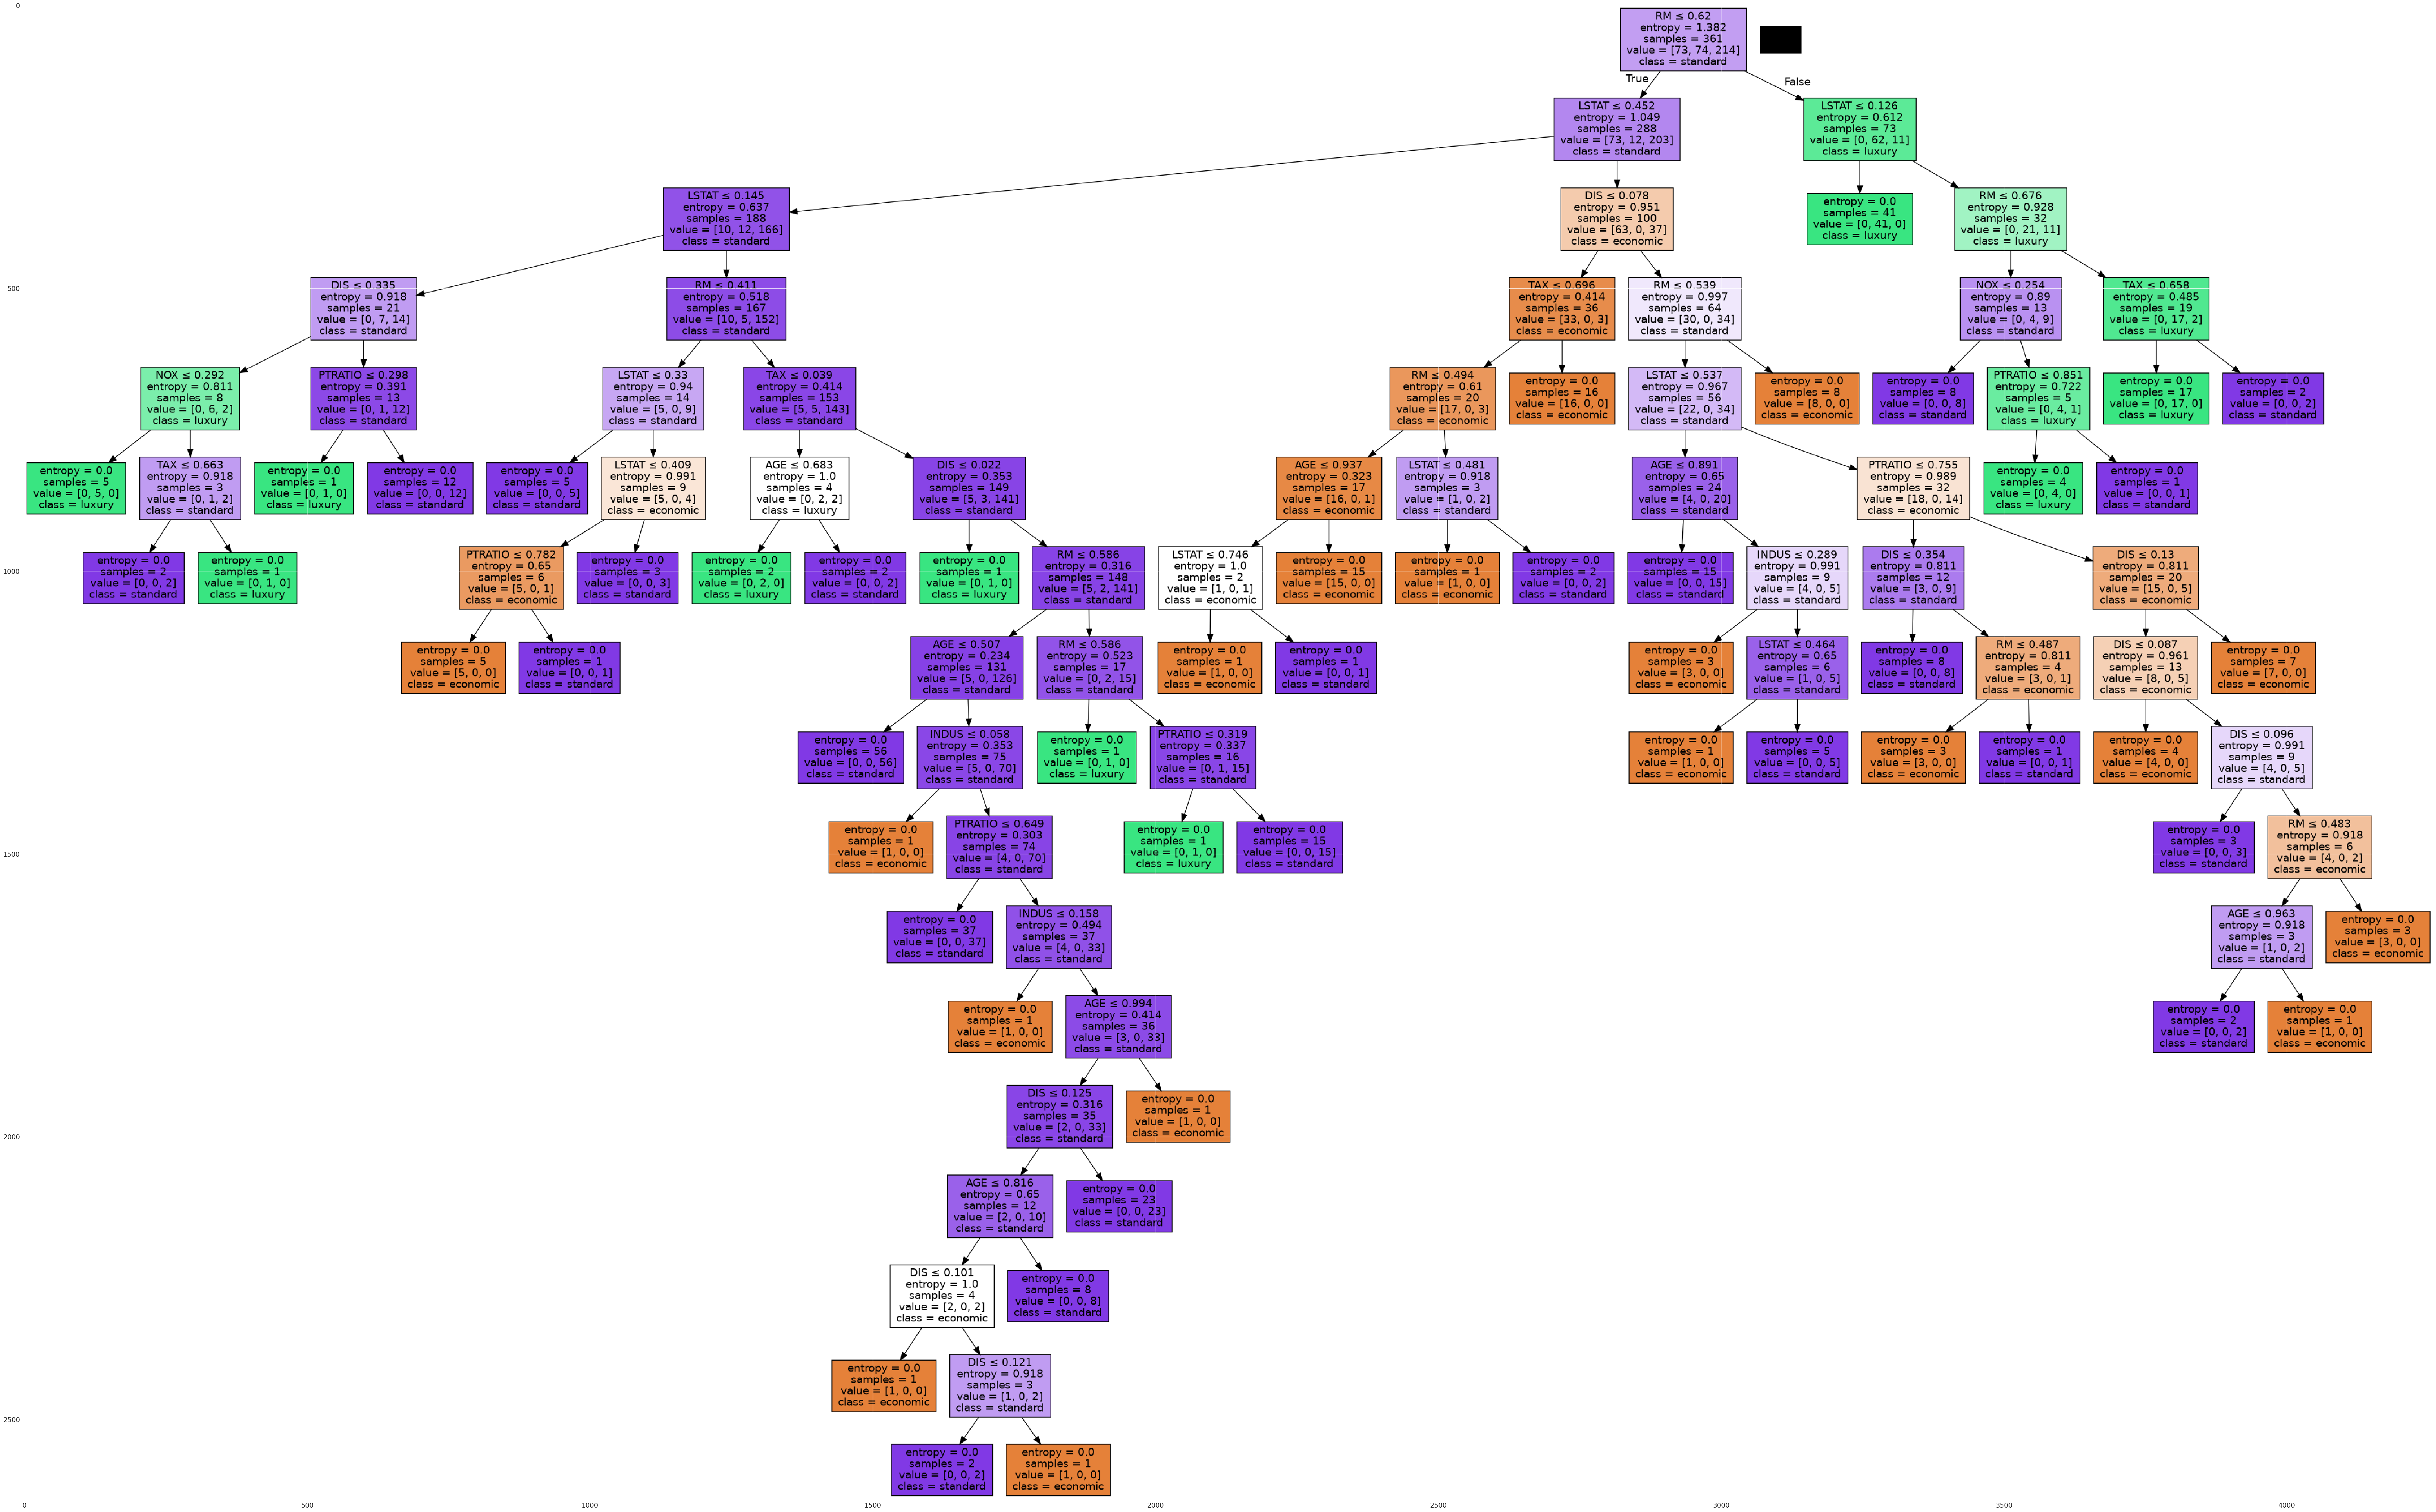

In [59]:
decisionTree_Model.draw_decision_tree(column_sels=column_used, dt_classifier=decisionTree_Model.dt_classifier)

In [52]:
class Decision_Tree_Grid_Model:
    def __init__(self, estimator, param_grid, scoring, cv, n_jobs) -> None:
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.cv = cv
        self.n_jobs = n_jobs
        self.DecisionTreeGridSearch = GridSearchCV(
            estimator=estimator,
            param_grid=self.param_grid,
            scoring=self.scoring,
            cv = self.cv,
            n_jobs = self.n_jobs,
        )

    def just_fit(self, X_train, y_train):
        self.DecisionTreeGridSearch.fit(X_train, y_train)
        print(f"Best Parameters are : {self.DecisionTreeGridSearch.best_params_}")

    def predict_based_on_search(self, X_train, y_train, X_test, y_test):
        preds_DT_Grid = self.DecisionTreeGridSearch.predict(X_test)
        print(f"Decision Tree Accuracy for train datas: {self.DecisionTreeGridSearch.score(X_train, y_train) * 100:5.2f}%")
        print(f"Decision Tree Accuracy for test datas: {self.DecisionTreeGridSearch.score(X_test, y_test) * 100:5.2f}%")

        cm_DT = make_confusion_matrix(y_test, preds_DT_Grid)
        print(classification_report(y_test, preds_DT_Grid))

    def draw_grid_tree(self, X_train):
        plt.figure(figsize=(30, 10))
        plot_tree(
        self.DecisionTreeGridSearch.best_estimator_,
            filled=True,
            feature_names = X_train.columns.tolist(),
        )
        plt.show()

In [53]:
decisionTree_Grid_Model = Decision_Tree_Grid_Model(
        estimator=DecisionTreeClassifier(), 
        param_grid={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": range(2, 20),
        "min_samples_split": range(2, 20),
        "min_samples_leaf": range(2, 20),
        "random_state": [84],
        },
        scoring="accuracy",
        cv= 4,
        n_jobs=-1,
    )
decisionTree_Grid_Model.just_fit(X_train=decisionTree_Model.X_train, y_train=decisionTree_Model.y_train)


Best Parameters are : {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 84, 'splitter': 'best'}


Decision Tree Accuracy for train datas: 87.81%
Decision Tree Accuracy for test datas: 80.43%


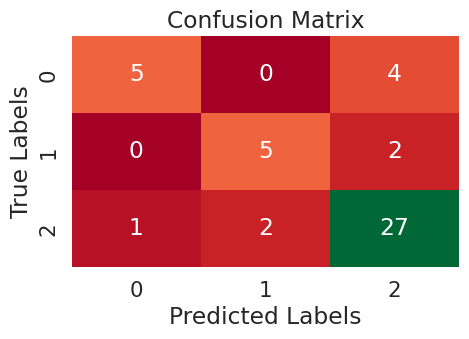

              precision    recall  f1-score   support

    economic       0.83      0.56      0.67         9
      luxury       0.71      0.71      0.71         7
    standard       0.82      0.90      0.86        30

    accuracy                           0.80        46
   macro avg       0.79      0.72      0.75        46
weighted avg       0.81      0.80      0.80        46



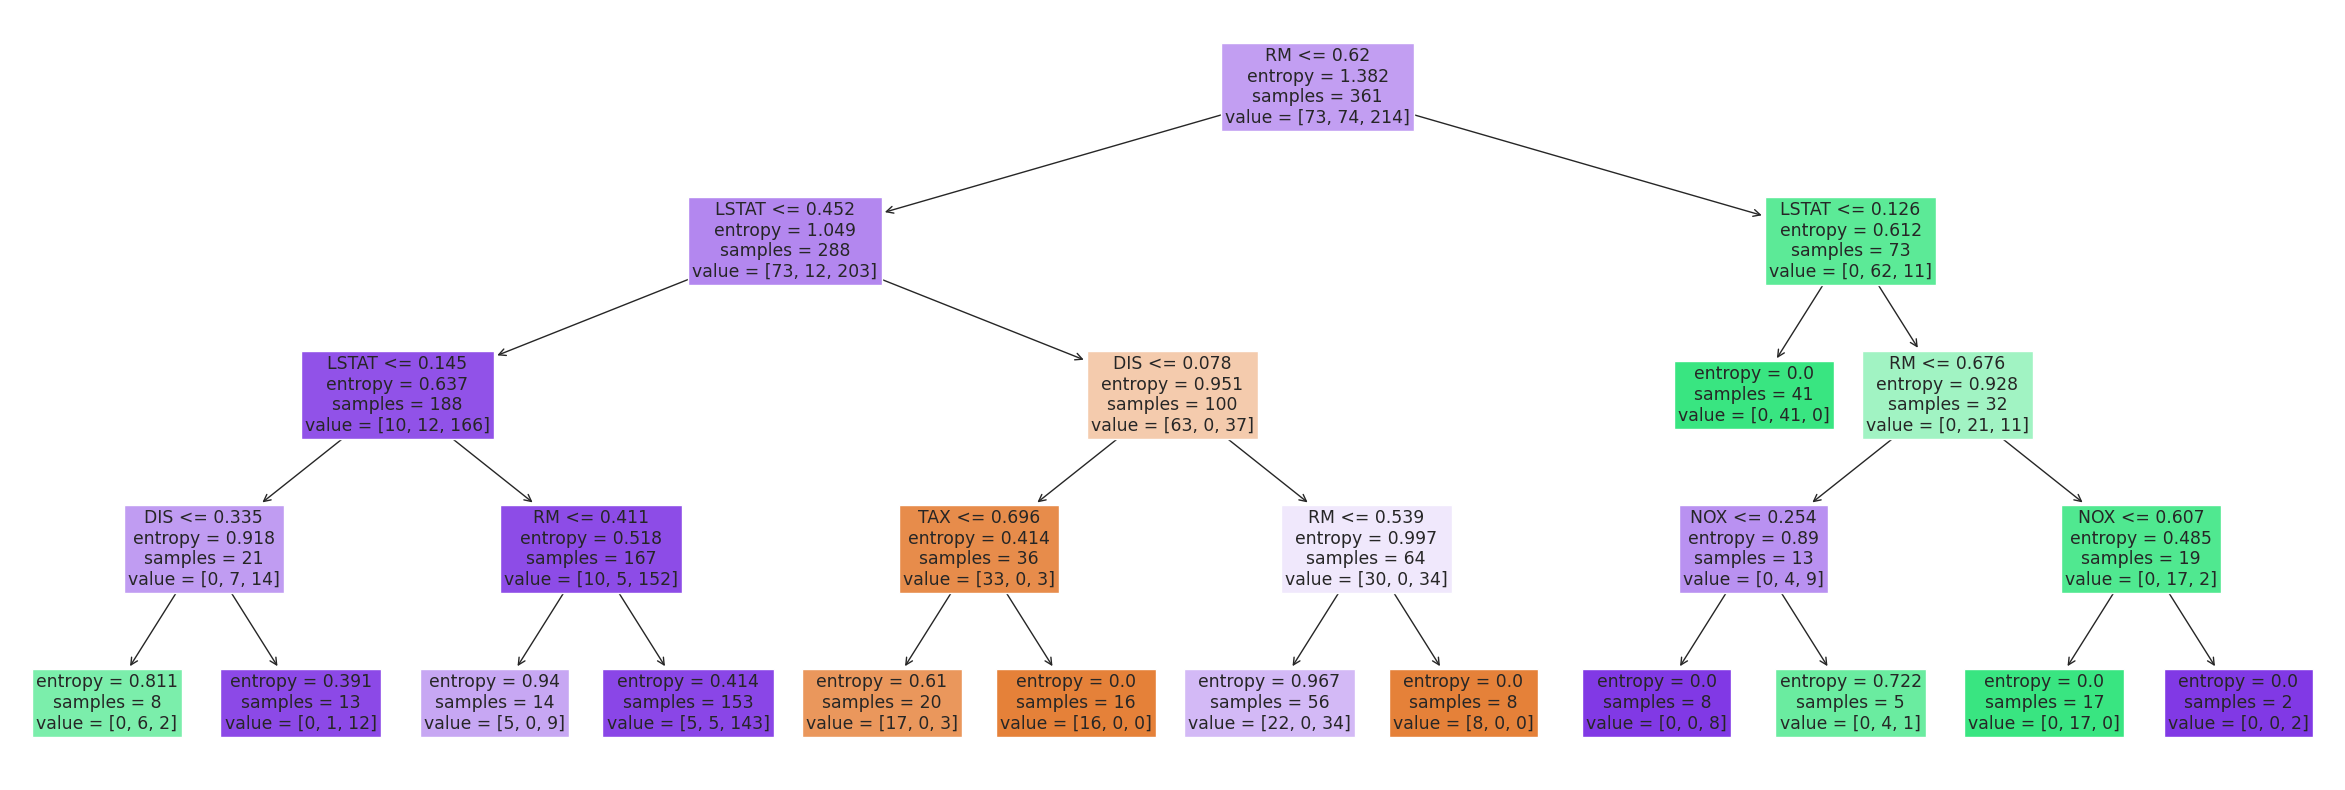

In [54]:
decisionTree_Grid_Model.predict_based_on_search(
    decisionTree_Model.X_train,
    decisionTree_Model.y_train, 
    decisionTree_Model.X_test, 
    decisionTree_Model.y_test
    )


decisionTree_Grid_Model.draw_grid_tree(decisionTree_Model.X_train)

### K-Nearest Neighbors

In [66]:
class KNN_Model:
    def __init__(self, k, df_for_knn) -> None:
        self.X = df_for_knn[["LSTAT", "INDUS", "NOX", 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE', "B", "CRIM", "ZN", "RAD"]]
        self.X = StandardScaler().fit(self.X).transform(self.X.astype(float))
        self.y = df['House_Category'].values
        self.k = k
        self.neigh = KNeighborsClassifier(n_neighbors = k)

    def get_train_test_data(self):
        self.X_train, X_temp, self.y_train, y_temp = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.X_valid, self.X_test, self.y_valid, self.y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    def fit_and_predict(self):
        self.neigh= self.neigh.fit(self.X_train, self.y_train)
        yhat = self.neigh.predict(self.X_test)
        return yhat

    def print_metrics(self, yhat):
        print(f"KNN Accuracy for train datas: {self.neigh.score(self.X_train, self.y_train) * 100:5.2f}%")
        print(f"KNN Accuracy for test datas: {self.neigh.score(self.X_test, self.y_test) * 100:5.2f}%")
        cm_KNN = make_confusion_matrix(self.y_test , yhat)
        print(classification_report(self.y_test, yhat))

KNN Accuracy for train datas: 88.92%
KNN Accuracy for test datas: 89.13%


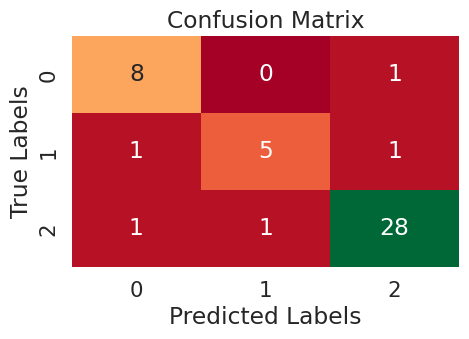

              precision    recall  f1-score   support

    economic       0.80      0.89      0.84         9
      luxury       0.83      0.71      0.77         7
    standard       0.93      0.93      0.93        30

    accuracy                           0.89        46
   macro avg       0.86      0.85      0.85        46
weighted avg       0.89      0.89      0.89        46



In [67]:
knnModel = KNN_Model(k=5, df_for_knn=df_for_knn)
knnModel.get_train_test_data()
yhat = knnModel.fit_and_predict()
knnModel.print_metrics(yhat=yhat)

In [68]:
class KNN_Grid_Model:
    def __init__(self, estimator, param_grid, scoring, cv, n_jobs) -> None:
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.cv = cv
        self.n_jobs = n_jobs
        self.KNNGridSearch = GridSearchCV(
            estimator=estimator,
            param_grid=self.param_grid,
            scoring=self.scoring,
            cv = self.cv,
            n_jobs = self.n_jobs,
        )

    def just_fit(self, X_train, y_train):
        self.KNNGridSearch.fit(X_train, y_train)
        print(f"Best Parameters are : {self.KNNGridSearch.best_params_}")

    def predict_based_on_search(self, X_train, y_train, X_test, y_test):
        preds_KNN_Grid = self.KNNGridSearch.predict(X_test)
        print(f"Decision Tree Accuracy for train datas: {self.KNNGridSearch.score(X_train, y_train) * 100:5.2f}%")
        print(f"Decision Tree Accuracy for test datas: {self.KNNGridSearch.score(X_test, y_test) * 100:5.2f}%")

        cm_DT = make_confusion_matrix(y_test, preds_KNN_Grid)
        print(classification_report(y_test, preds_KNN_Grid))

    def check_overfit(self, X_train, y_train, X_test, y_test):
        print(f"KNN Accuracy for train datas: {self.KNNGridSearch.score(X_train, y_train) * 100:5.2f}%")
        print(f"KNN Accuracy for test datas: {self.KNNGridSearch.score(X_test, y_test) * 100:5.2f}%")

In [69]:
knnGrid = KNN_Grid_Model(
        estimator=KNeighborsClassifier(),
        param_grid = {
            'n_neighbors': range(2, 20),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        },
        scoring="accuracy",
        cv = 5,
        n_jobs = -1,
    )
knnGrid.just_fit(X_train=knnModel.X_train, y_train=knnModel.y_train)

Best Parameters are : {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}


Decision Tree Accuracy for train datas: 88.64%
Decision Tree Accuracy for test datas: 86.96%


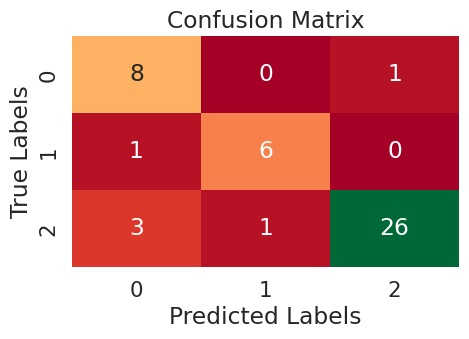

              precision    recall  f1-score   support

    economic       0.67      0.89      0.76         9
      luxury       0.86      0.86      0.86         7
    standard       0.96      0.87      0.91        30

    accuracy                           0.87        46
   macro avg       0.83      0.87      0.84        46
weighted avg       0.89      0.87      0.87        46



In [70]:
knnGrid.predict_based_on_search(
        knnModel.X_train,
        knnModel.y_train,
        knnModel.X_test,
        knnModel.y_test
    )

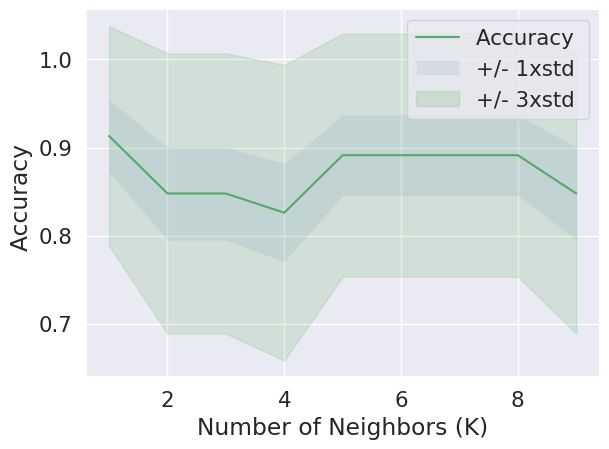

In [71]:
# This works better than GridSearch for KNN to find the best k!
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(knnModel.X_train, knnModel.y_train)
    yhat = neigh.predict(knnModel.X_test)
    mean_acc[n-1] = accuracy_score(knnModel.y_test, yhat)

    
    std_acc[n-1] = np.std(yhat==knnModel.y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [72]:
print("The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax() + 1)

The best accuracy was with 0.9130434782608695 with k = 1


In [73]:
knnGrid.check_overfit(
    knnModel.X_train,
    knnModel.y_train,
    knnModel.X_test,
    knnModel.y_test
)

KNN Accuracy for train datas: 88.64%
KNN Accuracy for test datas: 86.96%


##### Here it seems that overfitting is not occured.

### 31. Has underfitting or overfitting occurred in your models? Generally, when does this phenomenon occur? Explain each one.

**`Underfitting`** occurs when a model is too simple and is unable to capture the underlying structure of the data. Consequently, it performs poorly on the training data and does not generalize well to unseen data. Underfitting can be caused by an overly simplistic model, not enough training data, or a lack of complexity in the model to capture the signals in the data.

`Signs of underfitting include`:
- Low accuracy on the training data.
- The model's performance on training and validation datasets is similarly poor.
- Simplistic assumptions about the data's structure that overlook the complexities.

`Strategies to combat underfitting`:
- Increasing model complexity (using more features or complex model architectures).
- Using fewer features.
- Gathering more training data or constructing additional features from the existing data.
- Reducing the amount of regularization applied to the model (if any).

**`Overfitting`**, on the other hand, happens when a model is too complex and captures noise in the training data as if it were a real pattern. This leads to high performance on the training data but poor generalization to new, unseen data. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

`Signs of overfitting include`:
- High accuracy on the training data, but significantly lower accuracy on validation or test data.
- The model seems to fit the training data too well, capturing noise and outliers.

`Strategies to combat overfitting`:
- Simplifying the model (reducing its complexity).
- Collecting more training data.
- Employing techniques such as cross-validation to get a better estimate of model performance.
- Implementing regularization techniques (like L1, L2, dropout for neural networks) that penalize overly complex models.
- Pruning the model (for decision trees) or using ensemble methods.


I have shown above that the models overfit/underfit or not

## Phase 4: Ensemble methods

### 32. Explain why ensemble methods are used and why these methods are of great importance today.
1. **`Improved Predictive Accuracy`**: Ensemble methods often result in better predictive accuracy compared to individual base models. By combining the predictions of multiple models, ensemble methods can reduce bias and variance, leading to more robust and reliable predictions.
2. **`Robustness to Noise and Variability`**: Ensemble methods are less susceptible to noise and variability in the data compared to single models. By aggregating the predictions of multiple models, ensemble methods can smooth out individual model errors and provide more stable predictions.
3. **`Reduction of Overfitting`**: Ensemble methods can help mitigate overfitting by reducing the variance of the model. By combining the predictions of multiple models, ensemble methods can generalize better to unseen data and avoid capturing noise in the training data.
4. **`Flexibility and Adaptability`**: Ensemble methods are versatile and can be applied to a wide range of machine learning tasks, including classification, regression, and clustering. They can also be combined with various base models and algorithms, allowing for flexibility in model selection and customization.
5. **`Handling Complex Relationships`**: Ensemble methods can capture complex relationships in the data by combining the strengths of multiple base models. This is particularly useful when the underlying relationship between features and the target variable is non-linear or involves interactions between multiple variables.



### 33. Describe the general mechanism of Boosting and Bagging methods for classification and explain their differences.
Bagging and boosting are both ensemble learning techniques that aim to improve the performance of machine learning models by combining the predictions of multiple base learners. These approaches differ in their methodologies, strategies, and goals. In this detailed explanation, we’ll delve into bagging and boosting, exploring their key concepts, algorithms, advantages, and potential challenges.

**`Bagging (Bootstrap Aggregating)`**:

Bagging is a popular ensemble learning technique that focuses on reducing variance and improving the stability of machine learning models. The term “bagging” is derived from the idea of creating multiple subsets or bags of the training data through a process known as bootstrapping. Bootstrapping involves randomly sampling the dataset with replacement to generate multiple subsets of the same size as the original data. Each of these subsets is then used to train a base learner independently.

One of the primary goals of bagging is to reduce overfitting by exposing each base learner to slightly different variations of the training data. Since each subset is created by sampling with replacement, some instances may be duplicated while others may be omitted. This diversity helps the ensemble model generalize well to unseen data.

The most well-known algorithm for bagging is the Random Forest. In a Random Forest, a collection of decision trees is built, each trained on a different subset of the data. During the training process, each tree is constructed by selecting a random subset of features for each split, adding an extra layer of randomness and diversity to the ensemble. The final prediction is then made by averaging or taking a vote among the predictions of individual trees.

One key advantage of bagging is its ability to handle noisy data and outliers effectively. Since the ensemble model aggregates predictions from multiple base learners, the impact of outliers on the overall performance is reduced. Additionally, bagging is parallelizable, as each base learner can be trained independently, leading to efficient and scalable implementations.

Despite its strengths, bagging might not significantly improve the performance of an already stable model or one that is not prone to overfitting. It is particularly useful when dealing with complex models that have high variance, such as deep decision trees or neural networks.

**`Boosting`**:

Boosting, like bagging, is an ensemble learning technique, but it aims to improve the performance of weak learners by combining them in a sequential manner. The core idea behind boosting is to give more weight to misclassified instances during the training process, enabling subsequent learners to focus on the mistakes made by their predecessors.

Unlike bagging, boosting does not rely on bootstrapped subsets of the data. Instead, it assigns weights to each instance in the training set and adjusts these weights throughout the boosting iterations. In each iteration, a new weak learner is trained on the data, and the weights of misclassified instances are increased. This allows the subsequent learner to pay more attention to the previously misclassified examples.

The most well-known boosting algorithm is AdaBoost (Adaptive Boosting). In AdaBoost, the weak learners are usually simple models with low predictive power, such as shallow decision trees or stumps (trees with a single split). Each weak learner is trained sequentially, and at each iteration, the weights of misclassified instances are increased, forcing the model to focus on the difficult-to-classify examples.

AdaBoost assigns a weight to each weak learner based on its performance, and the final prediction is made by combining the weighted predictions of all weak learners. Instances that are consistently misclassified by the ensemble receive higher weights, allowing subsequent weak learners to give more emphasis to these challenging cases.

One of the significant advantages of boosting is its ability to handle complex relationships in the data and improve the performance of weak learners significantly. Boosting often outperforms bagging when it comes to reducing both bias and variance. However, boosting is more sensitive to noisy data and outliers compared to bagging.

**`Differences Between Bagging and Boosting`**:
1. **`Sequential vs. Parallel`**:
    - `Bagging`: The base learners are trained independently in parallel, as each learner works on a different subset of the data. The final prediction is typically an average or vote of all base learners.
    - `Boosting`: The base learners are trained sequentially, and each learner focuses on correcting the mistakes of its predecessors. The final prediction is a weighted sum of the individual learner predictions.
2. **`Data Sampling`**:
    - `Bagging`: Utilizes bootstrapping to create multiple subsets of the training data, allowing for variations in the training sets for each base learner.
    - `Boosting`: Assigns weights to instances in the training set, with higher weights given to misclassified instances to guide subsequent learners.
3. **`Weighting of Base Learners`**:
    - `Bagging`: All base learners typically have equal weight when making the final prediction.
    - `Boosting`: Assigns different weights to each base learner based on its performance, giving more influence to learners that perform well on challenging instances.
4. **`Handling Noisy Data and Outliers`**:
    - `Bagging`: Robust to noisy data and outliers due to the averaging or voting mechanism, which reduces the impact of individual errors.
    - `Boosting`: More sensitive to noisy data and outliers, as the focus on misclassified instances might lead to overfitting on these instances.
5. **`Model Diversity`**:
    - `Bagging`: Aims to create diverse base learners through random subsets of the data and, in the case of Random Forests, random feature selection for each tree.
    - `Boosting`: Focuses on improving the performance of weak learners sequentially, with each learner addressing the weaknesses of its predecessors.
6. **`Bias and Variance`**:
    `Bagging`: Primarily reduces variance by averaging predictions from multiple models, making it effective for models with high variance.
    `Boosting`: Addresses both bias and variance, with a focus on reducing bias by sequentially correcting mistakes made by weak learners.

resource: https://medium.com/@roshmitadey/bagging-v-s-boosting-be765c970fd1




### 34. Briefly explain how the random forest method works.
Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance. In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results. Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.

The random Forest algorithm works in several steps which are discussed below:

- `Ensemble of Decision Trees`: Random Forest leverages the power of ensemble learning by constructing an army of Decision Trees. These trees are like individual experts, each specializing in a particular aspect of the data. Importantly, they operate independently, minimizing the risk of the model being overly influenced by the nuances of a single tree.
- `Random Feature Selection`: To ensure that each decision tree in the ensemble brings a unique perspective, Random Forest employs random feature selection. During the training of each tree, a random subset of features is chosen. This randomness ensures that each tree focuses on different aspects of the data, fostering a diverse set of predictors within the ensemble.
- `Bootstrap Aggregating or Bagging`: The technique of bagging is a cornerstone of Random Forest’s training strategy which involves creating multiple bootstrap samples from the original dataset, allowing instances to be sampled with replacement. This results in different subsets of data for each decision tree, introducing variability in the training process and making the model more robust.
- `Decision Making and Voting`: When it comes to making predictions, each decision tree in the Random Forest casts its vote. For classification tasks, the final prediction is determined by the mode (most frequent prediction) across all the trees. In regression tasks, the average of the individual tree predictions is taken. This internal voting mechanism ensures a balanced and collective decision-making process.

### 35. What is the concept of bootstrapping in random forests? How does it work and how does it affect the results of the model?
Random Forest is a techniques of ensemble learning through Bagging. (Bagging = Bootstrap + Aggregation)
Bootstrap means that instead of training on all the observations, each tree of Random Forest is trained on a subset of the observations. The chosen subset is called the bag, and the remaining are called Out of Bag samples.

Multiple trees are trained on different bags, and later the results from all the trees are aggregated. The aggregation step helps reduce Variance.

**`How Bootstrapping Affects the Results`**:
- `Promotes Diversity`: By training each decision tree on a different bootstrap sample, bootstrapping promotes diversity among the trees in the random forest. This diversity is important for improving the generalization performance of the ensemble model.
- `Reduces Overfitting`: Since each tree is trained on a subset of the data, bootstrapping helps to reduce overfitting by preventing individual trees from memorizing the training data. Instead, the ensemble model learns to generalize well to unseen data.
- `Increases Robustness`: Bootstrapping helps to increase the robustness of the model by reducing the impact of outliers and noise in the training data. By averaging or voting across multiple trees, the random forest can make more reliable predictions.
- `Improves Accuracy`: By aggregating predictions from multiple trees, the random forest can achieve higher accuracy compared to individual decision trees. The ensemble model tends to be more robust and less sensitive to variations in the training data.


### 36. Does the number of decision trees in the random forest affect the efficiency of the model? What is the best value empirically?
Random forest are powerful machine learning algorithms known for their accuracy and versatility. They work by combining multiple decision trees, creating a more robust model than any single tree. However, two key parameters influence a random forest’s performance: the number of trees (n_estimators) and the depth of those trees (max_depth).

- **`Number of Trees (n_estimators)`**: More trees generally lead to better accuracy, as the forest averages out the predictions of individual trees, reducing variance. However, there’s a point of diminishing returns. With too many trees, the improvement becomes negligible, and computational cost increases.Generally, increasing the number of trees leads to better accuracy. Each tree introduces a unique perspective, and averaging their predictions reduces variance, leading to a more robust model.
- **`Tree Depth (max_depth)`**: Deeper trees can capture more complex relationships in the data. But excessively deep trees can lead to overfitting, where the model memorizes the training data instead of learning general patterns.

`some of the ways in which this parameter may affect our model`:

- **`Overfitting and Underfitting`**: If the depth of the tree is less in number then the model might underfit the data being unable to capture the underlying patterns in the data well, giving poor performance while performing on unseen data. In the same way, if the value of the ‘max_depth’ parameter is high then the model might overfit the data and capture noise, which may lead to poor performance on test data as the model becomes bad at generalizing the data.
- **`Increase in Model Complexity`**: The max_depth parameter of the random forest algorithm helps in determining the model complexity as the depth increases the model becomes more complex and in certain cases can lead to overfitting of data. The model might become hard to interpret if the depth of the model is in large number.
- **`Increase in Computational Complexity`**: As the depth of the model increases the processing requirement becomes more and the time required to process the data might also increase.

Here as we have see the three most important ways in which the depth of the random forest algorithm can affect our model’s performance. Therefore, selecting the right value for the ‘max_depth’ parameter becomes an essential task in any working project so that the model doesn’t underfit or overfit the data. 

The `optimal number of trees` empirically depends on various factors such as the complexity of the dataset, the computational resources available, and the desired trade-off between accuracy and efficiency.

- For smaller datasets or datasets with simpler patterns, a smaller number of trees (e.g., 100) may be sufficient.
- For larger and more complex datasets, increasing the number of trees (e.g., 500 or 1000) may lead to better performance, although the improvement may be marginal after a certain point.
- Cross-validation or grid search techniques can be used to find the optimal number of trees for a specific dataset. These techniques search over a range of values and evaluate the model's performance to determine the best value.

### 37. When is it not appropriate to use random forest? When is this method recommended?

**`When Not to Use Random Forests`**:
- `Interpretability`: Random forests are not the best choice when interpretability of the model is crucial. Due to the ensemble nature of random forests, it can be challenging to interpret individual decision trees within the forest, especially when the number of trees is large.
- `Computationally Expensive`: Training and evaluating a random forest with a large number of trees can be computationally expensive, especially for large datasets. In scenarios where computational resources are limited, simpler models may be preferred.
- `High-Dimensional Data`: Random forests may not perform well on datasets with a very large number of features compared to the number of samples. In such cases, feature selection or dimensionality reduction techniques may be more appropriate.
- `Linear Relationships`: If the relationship between features and the target variable is linear, simpler models such as linear regression or logistic regression may be more suitable and easier to interpret.

**`When Random Forests Are Recommended`**:
- `Highly Nonlinear Relationships`: Random forests excel in capturing complex nonlinear relationships between features and the target variable. They are particularly effective when the relationship is not easily modeled by simpler linear methods.
- `Robustness to Overfitting`: Random forests are robust to overfitting, making them suitable for datasets with noise or outliers. The ensemble nature of random forests helps generalize well to unseen data and mitigate the risk of overfitting.
- `Large Datasets`: Random forests can handle large datasets with many features effectively. They are less sensitive to irrelevant features and can automatically select the most informative ones.
- `Predictive Accuracy`: Random forests often achieve high predictive accuracy across a wide range of tasks and datasets. They are a go-to choice for many machine learning problems where accuracy is paramount.
- `Ensemble Learning`: Random forests are part of the ensemble learning family, which combines multiple models to produce better results. They are well-suited for ensemble methods due to their ability to reduce variance and improve generalization.

### 38. What effect does the use of random forest have on the variance?
The use of random forests typically reduces variance compared to individual decision trees. This reduction in variance is one of the key advantages of random forests and is achieved through the ensemble nature of the algorithm.

**`Reduction in Variance`**:
- `Bootstrapping`: Random forests bootstrap the data, meaning that each decision tree is trained on a different subset of the data. By training on different subsets, each tree captures different aspects of the data and makes different errors. When predictions are averaged or aggregated across all trees in the forest, the variance of the predictions tends to decrease.
- `Feature Randomness`: In addition to bootstrapping, random forests introduce randomness in the feature selection process for each split in the decision tree. Instead of considering all features at each split, the algorithm randomly selects a subset of features. This reduces the correlation between trees in the forest, further decreasing variance.
- `Ensemble Averaging`: The final prediction in a random forest is typically the average or majority vote of predictions from all decision trees in the forest. Averaging the predictions of multiple trees helps smooth out individual tree errors and reduce the overall variance of the ensemble model.

Overall, the use of random forests leads to a reduction in variance, which contributes to their effectiveness and robustness as a machine learning algorithm. They are particularly well-suited for tasks where overfitting is a concern or where the data contains noise or variability.

### 39. In this section, after briefly explaining each of the metaparameters of the random forest, train this model again using the GridSearchCV function and report the best metaparameters. (There is no need to train the model and select hyper-parameters by trial and error.)

Here are some of the key hyperparameters for Random Forest:

1. **`n_estimators`**: This determines the number of trees in the forest. Generally, more trees increase performance and make the predictions more stable, but they also add to the computational cost.

2. **`criterion`**: The function used to evaluate the quality of a split in the decision trees. Standard options are "gini" for the Gini impurity and "entropy" for the information gain.

3. **`max_depth`**: The maximum depth of each tree. Deeper trees can capture more complex patterns but also can lead to overfitting.

4. **`min_samples_split`**: The minimum number of samples required to split an internal node. Increasing this number can prevent the model from learning too much noise and thus overfitting.

5. **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. This parameter has a similar effect as min_samples_split and helps to control overfitting.

6. **`max_features`**: The number of features to consider when looking for the best split. Options include "auto", "sqrt", "log2", or a specific number/max percentage of features to include. This affects the diversity of trees in the forest.

7. **`bootstrap`**: Whether bootstrap samples are used when building trees. If `False`, the whole dataset is used to build each tree.

8. **`oob_score`**: Whether to use out-of-bag samples to estimate the R^2 on unseen data. If `True`, it uses out-of-bag samples from the training set as a validation set.

9. **`n_jobs`**: Determines the number of CPU cores to use when training and predicting. `-1` means using all cores.

10. **`random_state`**: Controls the randomness of the bootstrapping of the samples and the features chosen for splitting at each node. It ensures that the model's results are reproducible.

11. **`max_leaf_nodes`**: The maximum number of terminal nodes or leaves in a tree. Can be used to control overfitting similar to max_depth.

12. **`min_impurity_decrease`**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

13. **`class_weight`**: Weights associated with classes. This is particularly useful when dealing with imbalanced data sets.



In [80]:
df_for_dtree

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  1.0  273.0     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  1.0  273.0     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  1.0  273.0     21.0   

           B  LSTAT  MEDV  
0    396.900   4.98  24.0  
1    396.900   9.14  21.6  
2    392.830   4.03  34.7  
3    394.865   2.94  33.4  
4    396.900   5.33  36.2  
..       ...    ...   ...  
501  391.990   9.67  22.4  
502  396.900   9.08  20.6  
503  396.900   5.64  23.9  
504  393.450   6.48  22.0  
505  396.900   7.88  11.9  

[452 rows x 13 columns]

In [98]:
class Random_Forest_Grid_Model:
    def __init__(self, estimator, param_grid, scoring, cv, n_jobs) -> None:
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.cv = cv
        self.n_jobs = n_jobs
        self.RandomForestGridSearch = GridSearchCV(
            estimator = estimator,
            param_grid = self.param_grid,
            scoring = self.scoring,
            cv = self.cv,
            n_jobs = self.n_jobs,
        )
        
    def make_train_and_test(self, df_for_dtree):
        column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
        X = df_for_dtree.loc[:,column_sels]
        Y = df_for_dtree["House_Category"]
        self.X_train, X_temp, self.y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
        self.X_valid, self.X_test, self.y_valid, self.y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


    def just_fit(self):
        self.RandomForestGridSearch.fit(self.X_train, self.y_train)
        print(f"Best Parameters are : {self.RandomForestGridSearch.best_params_}")

    def predict_based_on_search(self):
        preds_random_forest_Grid = self.RandomForestGridSearch.predict(self.X_test)
        print(f"Random Forest Accuracy for train data: {self.RandomForestGridSearch.score(self.X_train, self.y_train)}")
        print(f"Random Forest Accuracy for test data: {self.RandomForestGridSearch.score(self.X_test, self.y_test)}")

        cm_DT = make_confusion_matrix(self.y_test, preds_random_forest_Grid)
        print(classification_report(self.y_test, preds_random_forest_Grid))

    def plot_based_on_max_depth(self):
        plt.figure(figsize=(7, 4))

        mamad = []
        akbar = []
        for depth in range(5,50):
            RFC = RandomForestClassifier(max_depth=depth, random_state=84)
            RFC.fit(self.X_train, self.y_train)
            mamad.append(RFC.score(self.X_train, self.y_train))
            akbar.append(RFC.score(self.X_test, self.y_test))
            plt.plot(range(5,50), mamad, "b", label="Train Accuracy")
            plt.plot(range(5,50), akbar, "r", label="Test Accuracy")
            plt.legend()
            plt.xlabel("max_depths")
            plt.ylabel("Accuracy")
            plt.show()
        

Best Parameters are : {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 26, 'random_state': 84}
Random Forest Accuracy for train data: 0.889196675900277
Random Forest Accuracy for test data: 0.8695652173913043


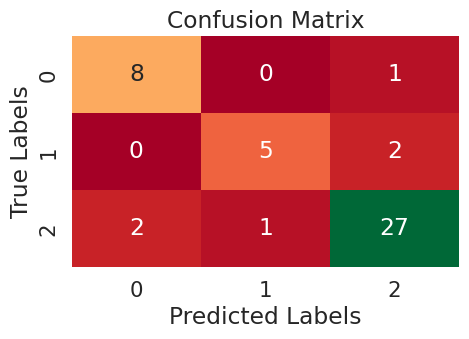

              precision    recall  f1-score   support

    economic       0.80      0.89      0.84         9
      luxury       0.83      0.71      0.77         7
    standard       0.90      0.90      0.90        30

    accuracy                           0.87        46
   macro avg       0.84      0.83      0.84        46
weighted avg       0.87      0.87      0.87        46



In [99]:
random_forest_Grid = Random_Forest_Grid_Model(
    estimator=RandomForestClassifier(),
    param_grid={
            "n_estimators": range(2, 50),
            "criterion": ["gini", "entropy"],
            "max_depth": range(2, 20),
            "random_state": [84],
    },
    scoring = "accuracy",
    cv = 4,
    n_jobs = -1,
    )
random_forest_Grid.make_train_and_test(df_for_dtree=df_for_dtree)
random_forest_Grid.just_fit()
random_forest_Grid.predict_based_on_search()

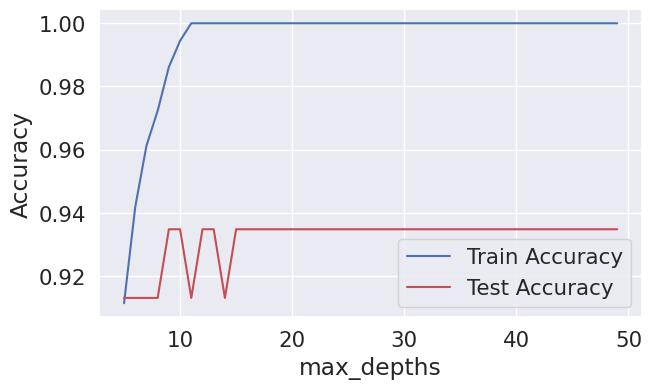

In [96]:
plt.figure(figsize=(7, 4))

mamad = []
akbar = []
for depth in range(5,50):
    RFC = RandomForestClassifier(max_depth=depth, random_state=84)
    RFC.fit(random_forest_Grid.X_train, random_forest_Grid.y_train)
    mamad.append(RFC.score(random_forest_Grid.X_train, random_forest_Grid.y_train))
    akbar.append(RFC.score(random_forest_Grid.X_test, random_forest_Grid.y_test))
plt.plot(range(5,50), mamad, "b", label="Train Accuracy")
plt.plot(range(5,50), akbar, "r", label="Test Accuracy")
plt.legend()
plt.xlabel("max_depths")
plt.ylabel("Accuracy")
plt.show()

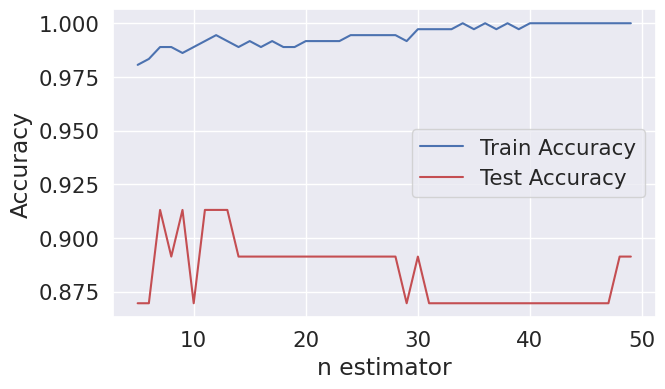

In [97]:
plt.figure(figsize=(7, 4))

test = []
train = []
for n in range(5,50):
    RFC = RandomForestClassifier(n_estimators=n, random_state=84)
    RFC.fit(random_forest_Grid.X_train, random_forest_Grid.y_train)
    train.append(RFC.score(random_forest_Grid.X_train, random_forest_Grid.y_train))
    test.append(RFC.score(random_forest_Grid.X_test, random_forest_Grid.y_test))
plt.plot(range(5,50), train, "b", label="Train Accuracy")
plt.plot(range(5,50), test, "r", label="Test Accuracy")
plt.legend()
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.show()

## Bonus Part: XGBoost

### 40. Briefly explain how XGboost works.
XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.

In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.



### 41. First explain the concept of Boosting Gradient and then explain the difference between Tree Boosting and Decision Tree.
The main idea behind this algorithm is to build models sequentially and these subsequent models try to reduce the errors of the previous model. But how do we do that? How do we reduce the error? This is done by building a new model on the errors or residuals of the previous model.

When the target column is continuous, we use Gradient Boosting Regressor whereas when it is a classification problem, we use Gradient Boosting Classifier. The only difference between the two is the “Loss function”. The objective here is to minimize this loss function by adding weak learners using gradient descent. Since it is based on loss function hence for regression problems, we’ll have different loss functions like Mean squared error (MSE) and for classification, we will have different for e.g log-likelihood.

Here’s how gradient boosting works in general:

1. **Loss Function to Optimize**: Gradient boosting is applicable to any differentiable loss function. The choice of loss function depends on the type of problem being solved (regression, classification, etc.).

2. **Weak Learner**: The weak learner in gradient boosting is typically a decision tree. These are short trees, sometimes called "stumps." They are weak in the sense that they do only slightly better than random guessing.

3. **Additive Model**: Trees are added one at a time to the ensemble, and each new tree helps to correct errors made by the previously trained tree. Unlike in bagging (Random Forests), trees are not trained independently of one another, but rather the outcomes of earlier tree predictions inform subsequent trees so that the next tree trained is trained to improve the mistakes of the prior one.

The gradient boosting procedure can be summarized in the following steps:

- Train an initial decision tree to the data and predict the outputs.
- Calculate the residuals (difference between predicted and true values).
- Train a new decision tree focused on correctly predicting the previous residuals.
- Add this new decision tree to the ensemble, typically with a small learning rate or multiplier to ensure that each tree only makes a controlled impact to the overall model (this slows down the training process but generally results in a more robust model).
- Iterate this process for a fixed number of trees or until residuals are minimized.

**Differences Between Boosting Trees and Decision Trees**:

- **Complexity**: A single decision tree is typically a "strong learner," a standalone model formed by repeatedly splitting the data based on certain features. Boosted trees, however, are "weak learners," with each one built in sequence to improve on the last, leading to a more complex overall model.

- **Performance**: Boosting trees frequently have better predictive accuracy than a single decision tree due to their sequential corrections of errors.

- **Risk of Overfitting**: While any model can overfit if not properly tuned or constrained, decision trees are especially prone to this when they grow deep. Boosting trees can also overfit, but the sequential nature of adding trees that correct previous errors usually makes them less prone to this problem, especially when using techniques such as gradient boosting with regularization (e.g., shrinkage).

- **Interpretability**: A single decision tree is generally more interpretable than boosted trees since you can easily visualize the tree and understand the path from root to leaf and the decisions made at each junction. Boosting involves combining multiple trees, which makes the decision process more complex and harder to visualize.

In summary, gradient boosting is a powerful algorithm that builds a series of weak learners in a strategic way to create a model that reduces error and increases predictive accuracy, whereas a decision tree is a simpler, standalone model that can serve as either a weak learner within a boosted ensemble or a strong learner on its own.

### 42. In this section, after briefly explaining each of the XGBoost meta-parameters using the GridSearchCV function that we met earlier, train this model and report the best meta-parameters. (There is no need to train the model and select meta-parameters by trial and error.)

XGBoost hyperparameters are the configuration settings that are used to optimize the performance of the XGBoost algorithm. Proper tuning of these parameters can lead to more accurate models, though it requires careful consideration as incorrect tuning may lead to underfitting or overfitting.

Some of the key XGBoost hyperparameters include:

1. **General Parameters**:
   - `booster`: Selects the type of model to run at each iteration. It can be `gbtree` (tree-based models), `gblinear` (linear models), or `dart` (Dropouts meet Multiple Additive Regression Trees).
   - `nthread`: Number of parallel threads used to run XGBoost.

2. **Booster Parameters**:
   - `eta` (also known as `learning_rate`): Step size shrinkage used to prevent overfitting. Range is [0,1].
   - `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child. Higher values prevent overfitting.
   - `max_depth`: Maximum tree depth for base learners. Increasing this value makes the model more complex and may lead to overfitting.
   - `max_leaf_nodes`: Maximum number of terminal nodes or leaves in a tree.
   - `gamma` (also known as `min_split_loss`): Minimum loss reduction required to make a further partition on a leaf node of the tree.
   - `subsample`: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost randomly sampled half of the training data prior to growing trees.
   - `colsample_bytree`: Subsample ratio of columns when constructing each tree.
   - `colsample_bylevel`: Subsample ratio of columns for each split, in each level.
   - `colsample_bynode`: Subsample ratio of columns for each split, in each node.
   - `lambda` (also known as `reg_lambda`): L2 regularization term on weights. Higher values prevent overfitting.
   - `alpha` (also known as `reg_alpha`): L1 regularization term on weights.

3. **Learning Task Parameters**:
   - `objective`: Specifies the learning task and the corresponding learning objective. Examples include `reg:squarederror` for regression tasks, `binary:logistic` for binary classification, `multi:softmax` for multiclass classification using the softmax objective, and `rank:pairwise` for ranking tasks.
   - `eval_metric`: Evaluation metrics for validation data, a default metric will be assigned according to objective (`rmse` for regression problems, `error` for classification, etc.).
   - `seed`: Random number seed.



In [102]:
class XGBoost_Model:
    def __init__(self, estimator, param_grid, scoring, cv, n_jobs) -> None:
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.cv = cv
        self.n_jobs = n_jobs
        self.XGBoost = GridSearchCV(
            estimator = estimator,
            param_grid = self.param_grid,
            scoring = self.scoring,
            cv = self.cv,
            n_jobs = self.n_jobs,
        )
        
    def make_train_and_test(self, df_for_dtree):
        column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
        X = df_for_dtree.loc[:,column_sels]
        Y = df_for_dtree["House_Category"]
        label_encoder = LabelEncoder()
        Y = label_encoder.fit_transform(Y)
        self.X_train, X_temp, self.y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
        self.X_valid, self.X_test, self.y_valid, self.y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


    def just_fit(self):
        self.XGBoost.fit(self.X_train.to_numpy(), self.y_train)
        print(f"Best Parameters are : {self.XGBoost.best_params_}")

    def predict_based_on_search(self):
        preds_random_forest_Grid = self.XGBoost.best_estimator_.predict(self.X_test)
        print(f"Random Forest Accuracy for test datas: {self.XGBoost.best_estimator_.score(self.X_test, self.y_test)}")

        cm_DT = make_confusion_matrix(self.y_test, preds_random_forest_Grid)
        print(classification_report(self.y_test, preds_random_forest_Grid))

Best Parameters are : {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.6}
Random Forest Accuracy for test datas: 0.8695652173913043


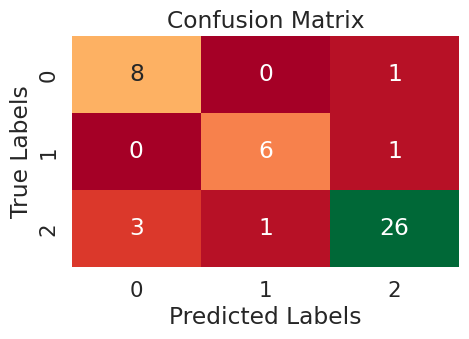

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.86      0.86      0.86         7
           2       0.93      0.87      0.90        30

    accuracy                           0.87        46
   macro avg       0.84      0.87      0.85        46
weighted avg       0.88      0.87      0.87        46



In [104]:
xgb = XGBClassifier(use_label_encoder=False)
xgboost_grid = XGBoost_Model(
    estimator = xgb,
    param_grid = {
        'max_depth': [3, 5, 7, 9],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    scoring = "accuracy",
    cv = 4,
    n_jobs = -1,
    )
xgboost_grid.make_train_and_test(df_for_dtree=df_for_dtree)
xgboost_grid.just_fit()
xgboost_grid.predict_based_on_search()

## Phase 5: Support Vector Machine

### 43. What points are called vector support and display it on a desired example.
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

`Hyperplanes and Support Vectors`:

`Hyperplanes` are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

`Support vectors` are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

![alt text](0_ecA4Ls8kBYSM5nza.webp)

### 44. What kind of data do you think SVM classifier is not suitable for classification?
Despite of its good theoretic foundations and high classification accuracy, normal SVM is not suitable for classification of large data sets, because the training complexity of SVM is highly dependent on the size of data set.
`Disadvantages of Support Vector Machine`:
- SVM algorithm is not suitable for large data sets.
- SVM does not perform very well when the data set has more noise i.e. target classes are overlapping. In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
- As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

### 45. Explain about kernels and their role in classification. (Explain the function of kernels and how they help classification)
Kernels play a vital role in Support Vector Machine (SVM) classification by enabling SVM to operate effectively in high-dimensional spaces and to handle non-linear decision boundaries. Here's an explanation of kernels and their role in classification:

`What are Kernels?`
Kernels play several key roles in SVM classification:

1. Non-linear Transformations:
    - Kernels allow SVM to implicitly map input data into a higher-dimensional space where the classes might be separable by a linear decision boundary. This is achieved without explicitly computing the transformation $ \phi(x) $.

2. Decision Boundary Flexibility:
    - By using different kernel functions, SVM can capture complex decision boundaries that are not possible with linear classifiers. Kernels enable SVM to model non-linear relationships between features and labels.

3. Computational Efficiency:
    - Kernel trick: Instead of explicitly computing the transformed feature vectors $ \phi(x) $ and $ \phi(y) $, SVM only needs to compute the kernel function $ K(x, y) $. This can lead to significant computational savings, especially when dealing with high-dimensional data.

4. Types of Kernels:
    - SVM supports various kernel functions such as linear, polynomial, radial basis function (RBF), sigmoid, etc. Each kernel has its own characteristics and is suitable for different types of data and classification problems.
    - Linear kernel: Appropriate for linearly separable data.
    - Polynomial kernel: Suitable for data with polynomial decision boundaries.
    - RBF kernel: Effective for capturing non-linear decision boundaries and works well in most cases without needing much parameter tuning.

5. Regularization and Margin Control:
    - The choice of kernel affects the SVM's decision boundary, as well as the margin between the classes. Some kernels may lead to softer margins, while others may lead to stricter margins, influencing the model's generalization capability and robustness to noise.

## 46. Explain the difference between soft svm classifier and hard svm classifier.
If we strictly impose that all points must be off the street on the correct side then this is called Hard Margin Classification. 

There are two issues with this method. First, it would only work with linearly separable data and not for non-linearly separable data (which may be linearly classifiable for the most part).

Second, is its sensitivity to outliers. In the figure below the Red Point is introduced as an outlier in the left class and it significantly changes the decision boundary, this may result in misclassifications of non-outlier data of the second class while testing the model.

![alt text](1_bnqnb8v2343Y9O2JWpgR3g.webp)

Although this model has not misclassified any of the points it is not a very good model and will give higher errors during testing.

To avoid this, we use Soft Margin Classification.

A soft margin is a type of margin that allows for some misclassification errors in the training data.


![alt text](1_9DGyAys-pyr03XPNqI2Chw.webp)

Here, a soft margin allows for some misclassification errors by allowing some data points to be on the wrong side of the decision boundary.

Even though there is a misclassification in the training data set and worse performance with respect to the previous model, the general performance would be much better during testing, as a result of how far it is from both classes.

But we can solve the problem of outliers by removing them using data preprocessing and data cleaning right? Then why Soft Margins?

They are used mainly when the data is not linearly separable, meaning that it is not possible to find a hyperplane that perfectly separates the classes without any errors and to avoid outliers (Hard Margin Classification is not possible). Example :

![alt text](1_Icb_nWyG8zfYfTsaH82hLA.webp)



### 47. Explain how to use SVM in regression problems by drawing the figure.
SVMs, although generally used for classification can be used for both regression and classification. Support Vector Regression (SVR) is a machine learning algorithm used for regression analysis. It is different from traditional linear regression methods as it finds a hyperplane that best fits the data points in a continuous space, instead of fitting a line to the data points.

SVR in contrast to SVM tries to maximise the number of points in the street (margin), the width is controlled by a hyperparameter ε (epsilon).

![alt text](1_Cfb1LWSSh8jF9bWuRkqXMQ.png)

An analogy of this could be passing a flyover or a bridge over buildings or houses where we want to give shade to the most number of houses keeping the bridge thinnest.

SVR wants to include the whole data into its reach while trying to minimise the margin, basically trying to encompass the points. Whereas linear regression wants to pass a line such that the sum of distances of the points from the line is minimum.



### 48. Now do the following steps to implement this method:
- 1. Categorize your data using existing libraries with 2 RBF and Linear kernels.
- 2. Submit the confusion matrix and model evaluation criteria such as F1, accuracy, recall..., and mention your analysis in the report.
- 3. Which of the Grid search and Random search methods should we use here?
In the context of Support Vector Machines (SVM), both Grid Search and Random Search can be effective methods for hyperparameter tuning. The choice between them depends on various factors including the size of the hyperparameter search space, computational resources, and time constraints.

`When to Use Grid Search`:
Grid Search is suitable when the hyperparameter search space is relatively small and well-defined.
It exhaustively searches over all combinations of hyperparameters specified in a grid.
It is appropriate when there is a clear understanding of which hyperparameters are important and what values they should take.

`Advantages`:
- Guarantees to find the best combination of hyperparameters within the specified grid.
- Provides a systematic and exhaustive search over the hyperparameter space.

`Disadvantages`:
- Can be computationally expensive, especially when the hyperparameter space is large or when using large datasets.
- May not be efficient if only a few hyperparameters significantly affect model performance.


`When to Use Random Search`:
Random Search is suitable when the hyperparameter search space is large or not well-defined.
It randomly samples hyperparameters from a specified distribution, which can be more efficient when the search space is vast or when certain hyperparameters are less important.

`Advantages`:
More efficient for large hyperparameter search spaces, as it does not need to explore all combinations exhaustively.
Allows for greater flexibility in the search process and can potentially find better solutions than Grid Search.

`Disadvantages`:
Does not guarantee to find the best combination of hyperparameters but rather samples randomly from the search space.
May require more iterations to converge to the optimal solution compared to Grid Search.

`Decision`:
- Grid Search: If the hyperparameter search space is relatively small and the computational resources are sufficient, Grid Search can be a good choice. It ensures that all possible combinations are explored.
- Random Search: If the hyperparameter search space is large or not well-defined, or if computational resources are limited, Random Search can be more efficient. It provides more flexibility and may converge faster in such cases.


In [105]:
class SVM_Model:
    def __init__(self, data_frame) -> None:
        self.df = data_frame
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
        self.y_test = None
        self.X_valid = None
        self.y_valid = None
        
    def bring_dataframe(self):
        column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
        X = self.df.loc[:,column_sels]
        Y = self.df["House_Category"]
        self.X_train, X_temp, self.y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
        self.X_valid, self.X_test, self.y_valid, self.y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    def fit_predict(self, kernel, random_state):
        svm_classifier = SVC(kernel=kernel, random_state=random_state)
        svm_classifier.fit(self.X_train, self.y_train)
        SVM_preds = svm_classifier.predict(self.X_test)
        return SVM_preds
    
    def make_confusion_matrix_and_classification_report(self, svm_pred):
        SVM_cm = make_confusion_matrix(self.y_test , svm_pred)
        print(classification_report(self.y_test, svm_pred))

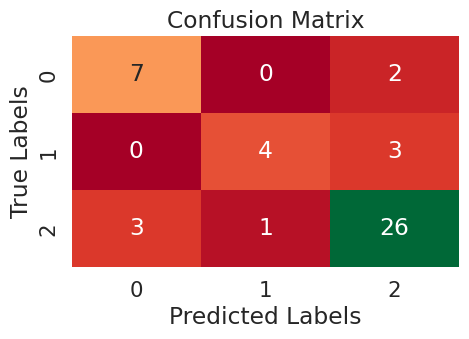

              precision    recall  f1-score   support

    economic       0.70      0.78      0.74         9
      luxury       0.80      0.57      0.67         7
    standard       0.84      0.87      0.85        30

    accuracy                           0.80        46
   macro avg       0.78      0.74      0.75        46
weighted avg       0.81      0.80      0.80        46



In [106]:
svm = SVM_Model(df_for_dtree)
svm.bring_dataframe()
svm_pred = svm.fit_predict(kernel="linear", random_state=42)
svm.make_confusion_matrix_and_classification_report(svm_pred=svm_pred)

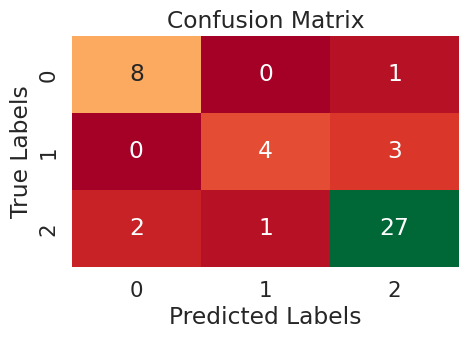

              precision    recall  f1-score   support

    economic       0.80      0.89      0.84         9
      luxury       0.80      0.57      0.67         7
    standard       0.87      0.90      0.89        30

    accuracy                           0.85        46
   macro avg       0.82      0.79      0.80        46
weighted avg       0.85      0.85      0.84        46



In [107]:
svm_pred = svm.fit_predict(kernel="rbf", random_state=42)
svm.make_confusion_matrix_and_classification_report(svm_pred=svm_pred)

In [108]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = df.loc[:,column_sels]
Y = df["House_Category"]
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [109]:
random_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear']
}

grid_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear']
}

In [110]:
svm_random = RandomizedSearchCV(
    SVC(),
    random_param_grid,
    cv=5, 
    n_iter=20, 
    verbose=2, 
    random_state=42, 
    scoring="accuracy",
    n_jobs=-1)

svm_random.fit(X_train, y_train)

print("Random Search Best Parameters:")
print(svm_random.best_params_)
print()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=1, 

In [111]:
svm_grid = GridSearchCV(
    SVC(), 
    grid_param_grid, 
    cv=5,
    scoring="accuracy",
    verbose=2, 
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

print("Grid Search Best Parameters:")
print(svm_grid.best_params_)
print()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s

[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s

[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

Random Search Classification Report:
              precision    recall  f1-score   support

    economic       0.64      0.78      0.70         9
      luxury       0.86      0.86      0.86         7
    standard       0.89      0.83      0.86        30

    accuracy                           0.83        46
   macro avg       0.80      0.82      0.81        46
weighted avg       0.84      0.83      0.83        46



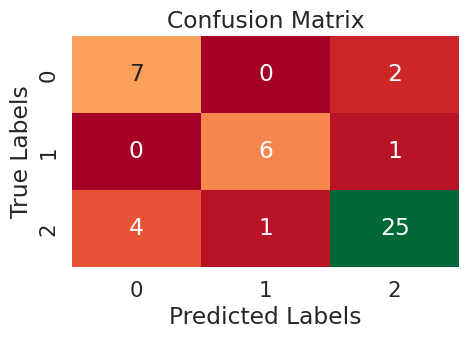

----------------------------------------------------------------------------------------------------
Grid Search Classification Report:
              precision    recall  f1-score   support

    economic       0.73      0.89      0.80         9
      luxury       0.88      1.00      0.93         7
    standard       0.96      0.87      0.91        30

    accuracy                           0.89        46
   macro avg       0.86      0.92      0.88        46
weighted avg       0.90      0.89      0.89        46



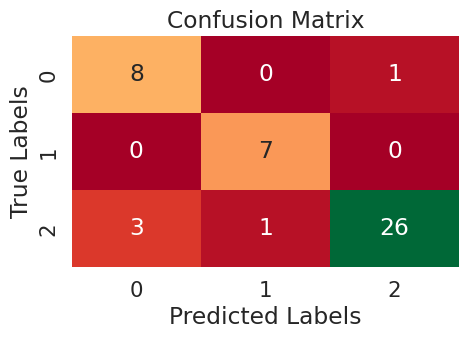

In [112]:
svm_random_preds = svm_random.predict(X_test)
print("Random Search Classification Report:")
print(classification_report(y_test, svm_random_preds))
svm_random_cm = make_confusion_matrix(y_test , svm_random_preds)

print(100 * "-")

svm_grid_preds = svm_grid.predict(X_test)
print("Grid Search Classification Report:")
print(classification_report(y_test, svm_grid_preds))
svm_grid_cm = make_confusion_matrix(y_test, svm_grid_preds)

## Phase 6: Evaluation of Models